<a href="https://colab.research.google.com/github/abigesh/abigesh/blob/master/classifier_performances_DT_and_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Better is TOMEK, SMOTEN, TOMEK & evaluate with (Tomekked) test set.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,  ExtraTreesClassifier
import sklearn.ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from statistics import mean, stdev

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE, SMOTENC, SMOTEN

In [ ]:
from imblearn.under_sampling import TomekLinks
tl =TomekLinks(sampling_strategy='auto')

In [ ]:
tl1=TomekLinks(sampling_strategy='all')

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.dataops import show_in_notebook
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate

In [ ]:
import shap
shap.initjs()

In [344]:
dt=pd.read_csv('/content/sample_data/corrected_data.csv')
dtt=pd.read_csv('/content/sample_data/corrected_data.csv')
# dt_n=pd.read_csv('corrected_data_NAMES.csv')

In [135]:
Xtom,ytom=tl.fit_resample(X,y)
Counter(ytom)

Counter({0: 2020, 1: 10082})

In [345]:
X=dt.drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).values
y=dt['target'].values
feat= dt.drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).columns

In [141]:
dt=pd.DataFrame(Xtom,columns=feat)    #after applied tomek to dt values


,CLEARINGCODE,FACCODE,DPTCODE,CRSCODE,debtor,HESA_COURSEAIMCODE,hesa_xlev501name,hesa_xmode01name,HESA_SEXIDCODE,hesa_xagea01code,month_of_birth,EIMD_QUINTILE,POLAR4,TUNDRA_Quintile,TTWA11CD,Travel Type,HESA_TTACCOMCODE,HESA_POSTCODEDIST,HESA_TTPCODEDIST,HESA_ETHNICCODE,HESA_QUALENT3CODE,lev3_qual_type,lev3_gradecomb,Parental Education Code,Socio Economic Code,Last School Code,HESA_XTPOINTS
0,0.0,0.0,5.0,16.0,0.0,0.0,0.0,1.0,1.0,19.0,10.0,1.0,3.0,3.0,1.0,1.0,4.0,9.804086,7.235105,31.0,29.0,0.0,11.0,2.0,6.0,801.0,240.0
1,0.0,3.0,10.0,51.0,0.0,0.0,0.0,1.0,1.0,18.0,7.0,5.0,3.0,4.0,71.0,0.0,2.0,4.764767,4.764767,10.0,19.0,0.0,12.0,2.0,6.0,971.0,128.0
2,0.0,0.0,5.0,16.0,0.0,0.0,0.0,1.0,1.0,19.0,8.0,3.0,3.0,3.0,127.0,0.0,2.0,8.990655,8.990655,31.0,19.0,0.0,11.0,2.0,9.0,1.0,168.0
3,0.0,0.0,5.0,16.0,0.0,0.0,0.0,1.0,1.0,20.0,8.0,1.0,3.0,4.0,2.0,0.0,2.0,6.687138,6.687138,32.0,19.0,0.0,11.0,2.0,4.0,470.0,160.0
4,0.0,0.0,6.0,34.0,0.0,0.0,0.0,0.0,2.0,18.0,4.0,2.0,4.0,5.0,2.0,0.0,2.0,6.408643,6.408643,32.0,29.0,4.0,16.0,2.0,4.0,524.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097,0.0,1.0,0.0,10.0,0.0,0.0,0.0,1.0,1.0,18.0,10.0,3.0,4.0,4.0,110.0,1.0,9.0,70.620498,3.072373,10.0,29.0,2.0,9.0,3.0,1.0,338.0,122.0
12098,1.0,6.0,21.0,107.0,0.0,0.0,0.0,0.0,1.0,19.0,5.0,4.0,3.0,4.0,89.0,1.0,9.0,25.934674,0.719894,10.0,29.0,0.0,16.0,2.0,1.0,1032.0,158.0
12099,1.0,0.0,6.0,34.0,0.0,0.0,0.0,0.0,2.0,20.0,7.0,1.0,3.0,4.0,71.0,0.0,2.0,0.936455,0.936455,32.0,32.0,4.0,16.0,2.0,9.0,847.0,0.0
12100,0.0,3.0,9.0,94.0,0.0,0.0,0.0,1.0,1.0,20.0,7.0,5.0,5.0,5.0,83.0,1.0,9.0,46.416495,0.719894,10.0,19.0,0.0,12.0,2.0,2.0,197.0,128.0


In [142]:
dt['target']=ytom

In [144]:
Xtrue=dt[dt.target==1].drop(columns=['target']).values
ytrue=dt[dt.target==1]['target'].values
Xfalse=dt[dt.target==0].drop(columns=['target']).values
yfalse=dt[dt.target==0]['target'].values

In [212]:
Xtrue=dt[dt.target==1].drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).values
ytrue=dt[dt.target==1]['target'].values
Xfalse=dt[dt.target==0].drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).values
yfalse=dt[dt.target==0]['target'].values

In [213]:
import random
ran_num=random.sample(range(len(Xtrue)),3000)
X1=Xtrue[ran_num]
Y1=ytrue[ran_num]
Y1


array([1, 1, 1, ..., 1, 1, 1])

In [211]:
len(ran_num) 

3000

In [222]:
# ran_num_pd=pd.DataFrame(ran_num,columns=['index_numbers'])

In [223]:
# ran_num_pd.to_excel("random_indices.xlsx")

In [214]:
X11=np.concatenate((X1,Xfalse),axis=0)
Y11=np.concatenate((Y1,yfalse),axis=0)

In [215]:
x_train,x_test,y_train,y_test=train_test_split(X11,Y11,random_state=0,stratify=Y11)

In [216]:
Counter(y_test)

Counter({0: 505, 1: 750})

In [217]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [218]:
rf_pred = rf.predict(x_test)       #no under sampling - no Tomek in dt
print(accuracy_score(y_test,rf_pred)*100)

65.0199203187251


In [219]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[212 293]
 [146 604]]
              precision    recall  f1-score   support

           0       0.59      0.42      0.49       505
           1       0.67      0.81      0.73       750

    accuracy                           0.65      1255
   macro avg       0.63      0.61      0.61      1255
weighted avg       0.64      0.65      0.64      1255
 0.6125676567656766


In [220]:
rf_p=rf.predict(X) 

In [221]:
print(confusion_matrix(y,rf_p))
print(classification_report(y,rf_p),roc_auc_score(y,rf_p))

[[1727  293]
 [1741 9181]]
              precision    recall  f1-score   support

           0       0.50      0.85      0.63      2020
           1       0.97      0.84      0.90     10922

    accuracy                           0.84     12942
   macro avg       0.73      0.85      0.76     12942
weighted avg       0.90      0.84      0.86     12942
 0.8477737276565964


In [166]:
print(confusion_matrix(y,rf_p))
print(classification_report(y,rf_p),roc_auc_score(y,rf_p))

[[1794  226]
 [2611 8311]]
              precision    recall  f1-score   support

           0       0.41      0.89      0.56      2020
           1       0.97      0.76      0.85     10922

    accuracy                           0.78     12942
   macro avg       0.69      0.82      0.71     12942
weighted avg       0.89      0.78      0.81     12942
 0.824530015719023


In [ ]:
rf_pred = rf.predict(x_test)                  #tomek applied dt data
print(accuracy_score(y_test,rf_pred)*100)

65.39823008849558


In [ ]:
print(confusion_matrix(y_test,rf_pred))        #tomek applied dt data
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[279 226]
 [165 460]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       505
           1       0.67      0.74      0.70       625

    accuracy                           0.65      1130
   macro avg       0.65      0.64      0.64      1130
weighted avg       0.65      0.65      0.65      1130
 0.6442376237623763


In [152]:
rf_pre=rf.predict(X)

In [ ]:
print(confusion_matrix(y,rf_pre))
print(classification_report(y,rf_pre),roc_auc_score(y,rf_pre))

[[1776  244]
 [2446 8476]]
              precision    recall  f1-score   support

           0       0.42      0.88      0.57      2020
           1       0.97      0.78      0.86     10922

    accuracy                           0.79     12942
   macro avg       0.70      0.83      0.72     12942
weighted avg       0.89      0.79      0.82     12942
 0.8276281317932196


# ***tomek applied dataset gives little reduced accuracy than actual data***

In [153]:
print(confusion_matrix(y,rf_pre)) 
print(classification_report(y,rf_pre),roc_auc_score(y,rf_pre))

[[1794  226]
 [2611 8311]]
              precision    recall  f1-score   support

           0       0.41      0.89      0.56      2020
           1       0.97      0.76      0.85     10922

    accuracy                           0.78     12942
   macro avg       0.69      0.82      0.71     12942
weighted avg       0.89      0.78      0.81     12942
 0.824530015719023


In [ ]:
tx,ty = tl.fit_resample(x_train,y_train)
print(Counter(ty))

Counter({1: 7566, 0: 1515})


In [ ]:
sx_tr,sy_tr=SMOTEN().fit_resample(tx,ty)
print(Counter(sy_tr))

Counter({1: 7566, 0: 7566})


In [ ]:
tsx_tr, tsy_tr = tl.fit_resample(sx_tr, sy_tr)
print(Counter(tsy_tr))

Counter({0: 7566, 1: 7384})


# ***Near Miss undersampling***

In [168]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
Xn, yn = undersample.fit_resample(X, y)
# summarize the new class distribution
Counter(yn)

Counter({0: 2020, 1: 2020})

In [171]:
x_train,x_test,y_train,y_test=train_test_split(Xn,yn,random_state=0,stratify=yn)

In [172]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [173]:
rf_pred = rf.predict(x_test)       #no under sampling - no Tomek in dt
print(accuracy_score(y_test,rf_pred)*100)

75.94059405940594


In [174]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[374 131]
 [112 393]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       505
           1       0.75      0.78      0.76       505

    accuracy                           0.76      1010
   macro avg       0.76      0.76      0.76      1010
weighted avg       0.76      0.76      0.76      1010
 0.7594059405940594


In [175]:
rf_pn=rf.predict(X) 

In [176]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1889  131]
 [7559 3363]]
              precision    recall  f1-score   support

           0       0.20      0.94      0.33      2020
           1       0.96      0.31      0.47     10922

    accuracy                           0.41     12942
   macro avg       0.58      0.62      0.40     12942
weighted avg       0.84      0.41      0.45     12942
 0.6215295769642886


# **Near miss version=2**

In [360]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
Xn, yn = undersample.fit_resample(X, y)
# summarize the new class distribution
Counter(yn)

Counter({0: 2020, 1: 2020})

In [335]:
x_train,x_test,y_train,y_test=train_test_split(Xn,yn,random_state=0,stratify=yn)

In [336]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [339]:
Counter(y_test)

Counter({0: 505, 1: 505})

In [337]:
rf_pred = rf.predict(x_test)      
print(accuracy_score(y_test,rf_pred)*100)

92.27722772277228


In [338]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[444  61]
 [ 17 488]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       505
           1       0.89      0.97      0.93       505

    accuracy                           0.92      1010
   macro avg       0.93      0.92      0.92      1010
weighted avg       0.93      0.92      0.92      1010
 0.9227722772277228


In [262]:
rf_pn=rf.predict(X) 

In [263]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1959   61]
 [8616 2306]]
              precision    recall  f1-score   support

           0       0.19      0.97      0.31      2020
           1       0.97      0.21      0.35     10922

    accuracy                           0.33     12942
   macro avg       0.58      0.59      0.33     12942
weighted avg       0.85      0.33      0.34     12942
 0.5904677361162228


**Adding more class1 data points to Xn**

In [361]:
Xtrue=dt[dt.target==1].drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).values
ytrue=dt[dt.target==1]['target'].values
Xfalse=dt[dt.target==0].drop(columns=['target','average_lateness', 'average_activities_attended','Total_credits_missed','Avg_Pass']).values
yfalse=dt[dt.target==0]['target'].values

In [362]:
import random
ran_num=random.sample(range(len(Xtrue)),1000)
X1=Xtrue[ran_num]
Y1=ytrue[ran_num]
# Y1


In [352]:
len(ran_num) 

1000

In [ ]:
# ran_num_pd=pd.DataFrame(ran_num,columns=['index_number'])
# ran_num_pd.to_excel('oss_random_indices.xlsx')

In [363]:
X11=np.concatenate((X1,Xn),axis=0)
Y11=np.concatenate((Y1,yn),axis=0)

In [364]:
Counter(Y11)

Counter({0: 2020, 1: 3020})

In [365]:
x_train,x_test,y_train,y_test=train_test_split(X11,Y11,random_state=0,stratify=Y11)

In [372]:
Counter(y_train)

Counter({0: 1515, 1: 2265})

In [366]:
rf_pred = rf.predict(x_test)      
print(accuracy_score(y_test,rf_pred)*100)

79.52380952380952


In [367]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[444  61]
 [197 558]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       505
           1       0.90      0.74      0.81       755

    accuracy                           0.80      1260
   macro avg       0.80      0.81      0.79      1260
weighted avg       0.82      0.80      0.80      1260
 0.8091403842370992


In [368]:
rf_pn=rf.predict(X) 

In [370]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1959   61]
 [8616 2306]]
              precision    recall  f1-score   support

           0       0.19      0.97      0.31      2020
           1       0.97      0.21      0.35     10922

    accuracy                           0.33     12942
   macro avg       0.58      0.59      0.33     12942
weighted avg       0.85      0.33      0.34     12942
 0.5904677361162228


# **Near miss version=3**

In [264]:
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
Xn, yn = undersample.fit_resample(X, y)
# summarize the new class distribution
Counter(yn)

Counter({0: 2020, 1: 2020})

In [265]:
x_train,x_test,y_train,y_test=train_test_split(Xn,yn,random_state=0,stratify=yn)

In [266]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [267]:
rf_pred = rf.predict(x_test)       
print(accuracy_score(y_test,rf_pred)*100)

68.31683168316832


In [268]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[309 196]
 [124 381]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       505
           1       0.66      0.75      0.70       505

    accuracy                           0.68      1010
   macro avg       0.69      0.68      0.68      1010
weighted avg       0.69      0.68      0.68      1010
 0.6831683168316831


In [269]:
rf_pn=rf.predict(X) 

In [270]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1824  196]
 [4920 6002]]
              precision    recall  f1-score   support

           0       0.27      0.90      0.42      2020
           1       0.97      0.55      0.70     10922

    accuracy                           0.60     12942
   macro avg       0.62      0.73      0.56     12942
weighted avg       0.86      0.60      0.66     12942
 0.7262516747920901


# **Condensed Nearest Neighbour**

In [271]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
Xn, yn = undersample.fit_resample(X, y)
# summarize the new class distribution
Counter(yn)

KeyboardInterrupt: ignored

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Xn,yn,random_state=0,stratify=yn)

In [ ]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
rf_pred = rf.predict(x_test)       
print(accuracy_score(y_test,rf_pred)*100)

62.67326732673267


In [ ]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[296 209]
 [168 337]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       505
           1       0.62      0.67      0.64       505

    accuracy                           0.63      1010
   macro avg       0.63      0.63      0.63      1010
weighted avg       0.63      0.63      0.63      1010
 0.6267326732673268


In [ ]:
rf_pn=rf.predict(X) 

In [ ]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1811  209]
 [4815 6107]]
              precision    recall  f1-score   support

           0       0.27      0.90      0.42      2020
           1       0.97      0.56      0.71     10922

    accuracy                           0.61     12942
   macro avg       0.62      0.73      0.56     12942
weighted avg       0.86      0.61      0.66     12942
 0.7278406649491171


# **OneSidedSelection**
# ***Better for the overall accuracy***

In [273]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1,n_seeds_S=200)
# transform the dataset
Xn, yn = undersample.fit_resample(X, y)
# summarize the new class distribution
Counter(yn)

Counter({0: 2020, 1: 9002})

In [274]:
dt=pd.DataFrame(Xn,columns=feat)    #after applied tomek to dt values
dt['target']=yn

In [275]:
Xtrue=dt[dt.target==1].drop(columns=['target']).values
ytrue=dt[dt.target==1]['target'].values
Xfalse=dt[dt.target==0].drop(columns=['target']).values
yfalse=dt[dt.target==0]['target'].values

In [321]:
import random
ran_num=random.sample(range(len(Xtrue)),3000)
X1=Xtrue[ran_num]
Y1=ytrue[ran_num]
Y1


array([1, 1, 1, ..., 1, 1, 1])

In [290]:
len(ran_num) 

3000

In [286]:
# ran_num_pd=pd.DataFrame(ran_num,columns=['index_number'])
# ran_num_pd.to_excel('oss_random_indices.xlsx')

In [322]:
X11=np.concatenate((X1,Xfalse),axis=0)
Y11=np.concatenate((Y1,yfalse),axis=0)

In [323]:
Counter(Y11)

Counter({0: 2020, 1: 3000})

In [324]:
x_train,x_test,y_train,y_test=train_test_split(X11,Y11,random_state=0,stratify=Y11)

In [325]:
rf=RandomForestClassifier(random_state=0, n_jobs=-1)     #,class_weight=wei)
rf.fit(x_train,y_train) 

RandomForestClassifier(n_jobs=-1, random_state=0)

In [326]:
rf_pred = rf.predict(x_test)       
print(accuracy_score(y_test,rf_pred)*100)

65.65737051792829


In [327]:
print(confusion_matrix(y_test,rf_pred)) 
print(classification_report(y_test,rf_pred),roc_auc_score(y_test,rf_pred))

[[236 269]
 [162 588]]
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       505
           1       0.69      0.78      0.73       750

    accuracy                           0.66      1255
   macro avg       0.64      0.63      0.63      1255
weighted avg       0.65      0.66      0.65      1255
 0.6256633663366337


In [328]:
rf_pn=rf.predict(X) 

In [329]:
print(confusion_matrix(y,rf_pn))
print(classification_report(y,rf_pn),roc_auc_score(y,rf_pn))

[[1751  269]
 [1956 8966]]
              precision    recall  f1-score   support

           0       0.47      0.87      0.61      2020
           1       0.97      0.82      0.89     10922

    accuracy                           0.83     12942
   macro avg       0.72      0.84      0.75     12942
weighted avg       0.89      0.83      0.85     12942
 0.8438718020309629


**testing with unused Xtrue index data points along with x_test['target']==0**

In [330]:
nonum=[x for x in range(len(Xtrue)) if x not in ran_num]
len(nonum)

6002

In [331]:
Xcom=np.concatenate((Xtrue[nonum],x_test[np.where(y_test==0)]),axis=0)
ycom=np.concatenate((ytrue[nonum],y_test[np.where(y_test==0)]),axis=0)

In [332]:
Counter(ycom)

Counter({0: 505, 1: 6002})

In [333]:
rf_pnn=rf.predict(Xcom) 
print(confusion_matrix(ycom,rf_pnn))
print(classification_report(ycom,rf_pnn),roc_auc_score(ycom,rf_pnn))

[[ 236  269]
 [1247 4755]]
              precision    recall  f1-score   support

           0       0.16      0.47      0.24       505
           1       0.95      0.79      0.86      6002

    accuracy                           0.77      6507
   macro avg       0.55      0.63      0.55      6507
weighted avg       0.89      0.77      0.81      6507
 0.629781327016407


# Smoten, Tomek

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

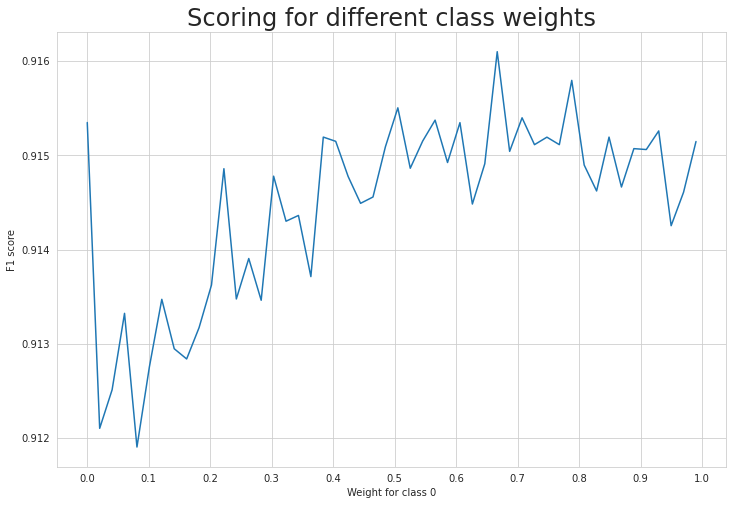

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= xgbst, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 0') 
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

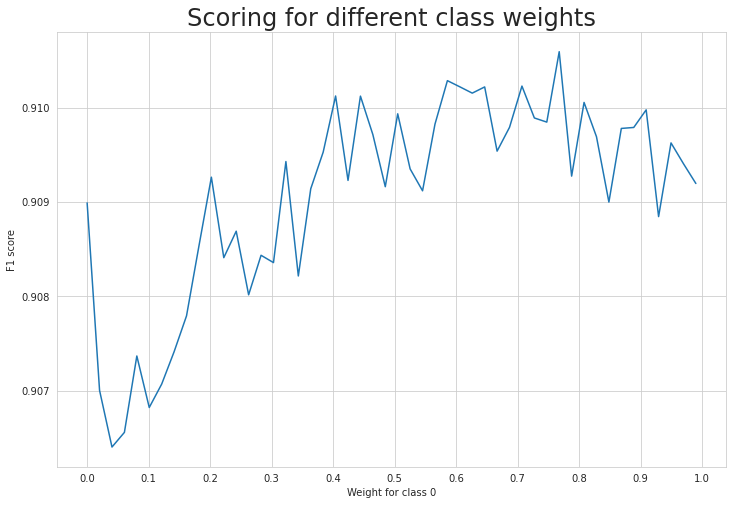

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= xgbst, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(tx, ty)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 0') 
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
wei={0:0.76,1:0.24} 
xgbst=RandomForestClassifier(random_state=0, n_jobs=-1,class_weight=wei)
xgbst.fit(tx,ty)

RandomForestClassifier(class_weight={0: 0.76, 1: 0.24}, n_jobs=-1,
                       random_state=0)

In [ ]:
ts_pred = xgbst.predict(x_test)
print(accuracy_score(y_test,ts_pred)*100)

83.93077873918418


In [ ]:
print(confusion_matrix(y_test,ts_pred))
print(classification_report(y_test,ts_pred),roc_auc_score(y_test,ts_pred))

[[  17  488]
 [  32 2699]]
              precision    recall  f1-score   support

           0       0.35      0.03      0.06       505
           1       0.85      0.99      0.91      2731

    accuracy                           0.84      3236
   macro avg       0.60      0.51      0.49      3236
weighted avg       0.77      0.84      0.78      3236
 0.5109730233367533


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, ts_pred)
  

Text(0.5, 1.0, 'Precision-Recall Curve')

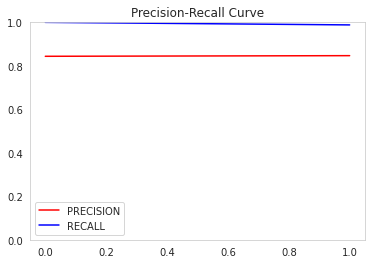

In [ ]:
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.ylim(0.0,1.0)
plt.title('Precision-Recall Curve')

# Smoten, Tomek - (Tomek applied on test set)

In [ ]:
xte,yte=tl.fit_resample(x_test, y_test)
Counter(yte)

In [ ]:
ts_p = xgbst.predict(xte)
print(accuracy_score(yte,ts_p)*100)

In [ ]:
print(confusion_matrix(yte,ts_p))
print(classification_report(yte,ts_p))

# Classifiers Performance

In [ ]:
def scross(m,X,y,scaling=False):
    lst_accu_stratified=[]
    lst_accu_stratified_p=[]
    lst_accu_stratified_r=[]
    lst_accu_stratified_f1=[]
    scale_cols=[]
    print("classifier name: ",m)
    scaler = StandardScaler()
    no_scale=['CLEARINGCODE','hesa_xlev501name','hesa_xmode01name','HESA_SEXIDCODE','Travel Type','debtor','target']
#     scale_cols=[i for i in X.columns if i not in (no_scale)]
#     scale_cols=np.squeeze(scale_cols)
#     print(scale_cols)
#     scaler.fit(X[scale_cols])
    for train_index, test_index in skf.split(X, y):
        x_train_fold= X[train_index]
        x_test_fold = X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        if scaling:
            print("scaled..")
#             for j in scale_cols:
            x_train_fold[scale_cols]=scaler.transform(x_train_fold[scale_cols])
            x_test_fold[scale_cols]=scaler.transform(x_test_fold[scale_cols])
       
 #        print(x_train_fold,x_test_fold,y_train_fold)
        x_train_fold=np.array(x_train_fold)
        x_test_fold=np.array(x_test_fold)        
        m.fit(x_train_fold, y_train_fold)
        x_res=m.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(x_res, y_test_fold))
        lst_accu_stratified_p.append(precision_score(x_res, y_test_fold,average='macro'))
        lst_accu_stratified_r.append(recall_score(x_res, y_test_fold,average='macro'))
        lst_accu_stratified_f1.append(f1_score(x_res, y_test_fold,average='macro'))
#         print(m,'\n',classification_report(x_res, y_test_fold))
#     print(lst_accu_stratified_p)
    return m,mean(lst_accu_stratified)*100,mean(lst_accu_stratified_p),mean(lst_accu_stratified_r),mean(lst_accu_stratified_f1)

In [ ]:
def classifi_performance(X_data,y_data,scaling=False,samp=False):
    classifier_names=['GNB']      #['DecisionTreeClassifier','SVC']
    classifiers=[GaussianNB()]                             #[DecisionTreeClassifier(max_depth=15), SVC(probability=True)]
    model=pd.DataFrame(classifier_names,columns=['classifier'])
    test_pre=[]
    models=[]
    test_rec=[]
    test_f1=[]
    prec=[]
    rec=[]
    f1=[] 
    test_acc=[]
    minimum=[]
    maximum=[]
    meanval=[]
    if samp:
        X_data,y_data=tomek_rebal(X_data,y_data)
        X_data_tr,X_data_te,y_data_tr,y_data_te = train_test_split(X_data,y_data,stratify=y_data,random_state=100)
        sx,sy=smote_rebal(X_data_tr,y_data_tr)
        X_data_tr,y_data_tr = tomek_rebal(sx,sy)
    else:
        X_data_tr,X_data_te,y_data_tr,y_data_te = train_test_split(X_data,y_data,stratify=y_data,random_state=100)
    for j,i in enumerate(classifiers):
        m=i
        
        m,me,p,r,f=scross(m,X_data_tr,y_data_tr,scaling=False)
        x_res=m.predict(X_data_te)
    #     acc.append(accuracies)  
#         maximum.append(ma)
#         minimum.append(mi)
        meanval.append(me)

        prec.append(p)
        rec.append(r)
        f1.append(f)
        test_acc.append(accuracy_score(x_res, y_data_te))
        test_pre.append(precision_score(x_res, y_data_te,average='macro'))
        test_rec.append(recall_score(x_res, y_data_te,average='macro'))
        test_f1.append(f1_score(x_res, y_data_te,average='macro'))
        print(Counter(y_data_te))
        print(classification_report(x_res, y_data_te))
    #     acc=np.reshape(acc,(1,-1))
    # model['Cross_Val_Accuracies']=acc
#     model['maximum']= maximum
#     model['minimum']= minimum
        models.append(m)
    model['cv_Mean_Accuracy']=meanval
    model['cv_Precision']=prec
    model['cv_Recall']= rec
    model['cv_F1 Score']=f1
    model['test_Accuracy']=test_acc
    model['test_Pre']=test_pre
    model['test_Recall']=test_rec
    model['test_F1']=test_f1
    return models,model

In [ ]:
def smote_rebal(X1,y1):
    oversample = SMOTEN()
    Xt, yt = oversample.fit_resample(X1,y1)
#     counter = Counter(yt)
    print("SMOTEN",Counter(yt))
    return (Xt,yt)

In [ ]:
def tomek_rebal(X1,y1):
    tl = TomekLinks()
    Xt, yt = tl.fit_resample(X1,y1)
#     counter = Counter(yt)
    print("TOMEK",Counter(yt))
    return (Xt,yt)

In [ ]:
dsm,ds_nonaca=classifi_performance(tx,ty,samp=True)

TOMEK Counter({1: 10082, 0: 2020})
SMOTEN Counter({1: 7561, 0: 7561})
TOMEK Counter({0: 7561, 1: 7271})
classifier name:  DecisionTreeClassifier(max_depth=15)
Counter({1: 2521, 0: 505})
              precision    recall  f1-score   support

           0       0.28      0.24      0.26       597
           1       0.82      0.85      0.83      2429

    accuracy                           0.73      3026
   macro avg       0.55      0.54      0.55      3026
weighted avg       0.71      0.73      0.72      3026

classifier name:  SVC(probability=True)
Counter({1: 2521, 0: 505})
              precision    recall  f1-score   support

           0       0.27      0.19      0.23       699
           1       0.78      0.84      0.81      2327

    accuracy                           0.69      3026
   macro avg       0.52      0.52      0.52      3026
weighted avg       0.66      0.69      0.67      3026



In [ ]:
ds_nonaca

,classifier,cv_Mean_Accuracy,cv_Precision,cv_Recall,cv_F1 Score,test_Accuracy,test_Pre,test_Recall,test_F1
0,DecisionTreeClassifier,83.535709,0.834921,0.836061,0.835091,0.729676,0.550352,0.544206,0.546230
1,SVC,73.611133,0.737028,0.738696,0.735819,0.692003,0.522991,0.517995,0.516835


In [ ]:
feature_names_non_aca=dt.drop(columns=['target','average_lateness','average_activities_attended', 'Avg_Pass','Total_credits_missed']).columns

In [ ]:
# dtc=DecisionTreeClassifier(max_depth=25,random_state=1200)
# dtc.fit(tsx_tr,tsy_tr)
p=dsm[0].predict(x_test)
print(confusion_matrix(p,y_test), classification_report(p,y_test))


In [ ]:
p_values={}

In [ ]:
# for i in range(2):
interpreter = Interpretation(training_data=X,training_labels=y, feature_names=feature_names_non_aca)
pyint_model = InMemoryModel(dsm[0].predict_proba,examples=X,target_names=np.unique(dt.target),
            unique_values=np.unique(y_train).tolist(),feature_names=feature_names_non_aca )
#     plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, progressbar=True)
p_values[0]=interpreter.feature_importance.feature_importance(pyint_model,ascending=False)

2022-01-20 18:49:37,958 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[27/27] features ████████████████████ Time elapsed: 3 seconds

In [ ]:
interpreter = Interpretation(training_data=X,training_labels=y, feature_names=feature_names_non_aca)
pyint_model = InMemoryModel(dsm[1].predict_proba,examples=X,target_names=np.unique(dt.target),
            unique_values=np.unique(y_train).tolist(),feature_names=feature_names_non_aca )
#     plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, progressbar=True)
p_values[1]=interpreter.feature_importance.feature_importance(pyint_model,ascending=False)

2022-01-20 18:50:35,355 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[27/27] features ████████████████████ Time elapsed: 60 seconds

In [ ]:
p_values

{0: HESA_POSTCODEDIST          0.172268
 Last School Code           0.131890
 HESA_XTPOINTS              0.089910
 lev3_qual_type             0.073716
 HESA_TTPCODEDIST           0.059440
 CRSCODE                    0.059201
 TTWA11CD                   0.052917
 hesa_xagea01code           0.045372
 POLAR4                     0.037653
 DPTCODE                    0.033320
 lev3_gradecomb             0.031240
 EIMD_QUINTILE              0.030688
 Socio Economic Code        0.028008
 month_of_birth             0.027237
 HESA_ETHNICCODE            0.021910
 TUNDRA_Quintile            0.021670
 FACCODE                    0.013414
 HESA_TTACCOMCODE           0.013245
 CLEARINGCODE               0.012339
 HESA_QUALENT3CODE          0.011657
 HESA_COURSEAIMCODE         0.011120
 Parental Education Code    0.010341
 HESA_SEXIDCODE             0.004892
 debtor                     0.003428
 hesa_xmode01name           0.002038
 Travel Type                0.001087
 hesa_xlev501name           0.00000

In [ ]:
dp=pd.DataFrame(p_values)
dp.index=dp.index
dp

,0,1
CLEARINGCODE,0.012339,2.969242e-05
CRSCODE,0.059201,8.772366e-02
DPTCODE,0.033320,2.318468e-02
EIMD_QUINTILE,0.030688,4.851162e-03
FACCODE,0.013414,3.184072e-03
HESA_COURSEAIMCODE,0.011120,3.238334e-03
HESA_ETHNICCODE,0.021910,5.736286e-02
HESA_POSTCODEDIST,0.172268,1.886503e-01
HESA_QUALENT3CODE,0.011657,1.484050e-02
HESA_SEXIDCODE,0.004892,3.989986e-04


In [ ]:
for i in dp.columns:    
    dp_ranks[i]=dp[i].rank(ascending=False)
dp_ranks

,0,1
CLEARINGCODE,19.0,25.0
CRSCODE,6.0,4.0
DPTCODE,10.0,8.0
EIMD_QUINTILE,12.0,15.0
FACCODE,17.0,18.0
HESA_COURSEAIMCODE,21.0,17.0
HESA_ETHNICCODE,15.0,6.0
HESA_POSTCODEDIST,1.0,2.0
HESA_QUALENT3CODE,20.0,12.0
HESA_SEXIDCODE,23.0,21.0


rank_lists=[['HESA_POSTCODEDIST',
  'Last School Code',
  'HESA_TTPCODEDIST',
  'HESA_XTPOINTS',
  'CRSCODE',
  'lev3_gradecomb',
  'TTWA11CD',
  'EIMD_QUINTILE',
  'POLAR4',
  'lev3_qual_type',
  'DPTCODE',
  'hesa_xagea01code',
  'month_of_birth',
  'FACCODE',
  'HESA_QUALENT3CODE',
  'TUNDRA_Quintile',
  'HESA_ETHNICCODE',
  'Socio Economic Code',
  'HESA_TTACCOMCODE',
  'HESA_SEXIDCODE',
  'HESA_COURSEAIMCODE',
  'Parental Education Code',
  'Travel Type',
  'hesa_xmode01name',
  'CLEARINGCODE',
  'debtor',
  'hesa_xlev501name'],
 ['HESA_POSTCODEDIST',
  'HESA_COURSEAIMCODE',
  'lev3_gradecomb',
  'hesa_xagea01code',
  'EIMD_QUINTILE',
  'HESA_TTPCODEDIST',
  'Last School Code',
  'HESA_ETHNICCODE',
  'POLAR4',
  'HESA_XTPOINTS',
  'month_of_birth',
  'TTWA11CD',
  'HESA_SEXIDCODE',
  'CRSCODE',
  'TUNDRA_Quintile',
  'HESA_TTACCOMCODE',
  'lev3_qual_type',
  'Parental Education Code',
  'Travel Type',
  'HESA_QUALENT3CODE',
  'debtor',
  'DPTCODE',
  'FACCODE',
  'hesa_xmode01name',
  'CLEARINGCODE',
  'Socio Economic Code',
  'hesa_xlev501name'],
 ['Last School Code',
  'EIMD_QUINTILE',
  'CRSCODE',
  'lev3_qual_type',
  'POLAR4',
  'FACCODE',
  'HESA_SEXIDCODE',
  'lev3_gradecomb',
  'TUNDRA_Quintile',
  'TTWA11CD',
  'HESA_XTPOINTS',
  'month_of_birth',
  'HESA_POSTCODEDIST',
  'DPTCODE',
  'HESA_TTACCOMCODE',
  'HESA_TTPCODEDIST',
  'hesa_xmode01name',
  'HESA_QUALENT3CODE',
  'Socio Economic Code',
  'HESA_ETHNICCODE',
  'Parental Education Code',
  'Travel Type',
  'hesa_xagea01code',
  'HESA_COURSEAIMCODE',
  'CLEARINGCODE',
  'debtor',
  'hesa_xlev501name'],
 ['HESA_POSTCODEDIST',
  'CRSCODE',
  'FACCODE',
  'Last School Code',
  'HESA_XTPOINTS',
  'hesa_xagea01code',
  'HESA_TTPCODEDIST',
  'lev3_qual_type',
  'TTWA11CD',
  'lev3_gradecomb',
  'HESA_ETHNICCODE',
  'EIMD_QUINTILE',
  'POLAR4',
  'HESA_QUALENT3CODE',
  'DPTCODE',
  'TUNDRA_Quintile',
  'month_of_birth',
  'HESA_COURSEAIMCODE',
  'HESA_SEXIDCODE',
  'Parental Education Code',
  'Socio Economic Code',
  'HESA_TTACCOMCODE',
  'debtor',
  'CLEARINGCODE',
  'Travel Type',
  'hesa_xlev501name',
  'hesa_xmode01name'],
 ['CRSCODE',
  'FACCODE',
  'HESA_POSTCODEDIST',
  'Last School Code',
  'TTWA11CD',
  'HESA_XTPOINTS',
  'DPTCODE',
  'HESA_TTPCODEDIST',
  'hesa_xagea01code',
  'POLAR4',
  'lev3_qual_type',
  'TUNDRA_Quintile',
  'lev3_gradecomb',
  'HESA_QUALENT3CODE',
  'EIMD_QUINTILE',
  'HESA_ETHNICCODE',
  'month_of_birth',
  'Socio Economic Code',
  'Parental Education Code',
  'HESA_COURSEAIMCODE',
  'HESA_SEXIDCODE',
  'hesa_xmode01name',
  'HESA_TTACCOMCODE',
  'debtor',
  'Travel Type',
  'CLEARINGCODE',
  'hesa_xlev501name'],
 ['Last School Code',
  'lev3_qual_type',
  'CRSCODE',
  'HESA_XTPOINTS',
  'EIMD_QUINTILE',
  'lev3_gradecomb',
  'HESA_ETHNICCODE',
  'HESA_POSTCODEDIST',
  'FACCODE',
  'month_of_birth',
  'DPTCODE',
  'hesa_xagea01code',
  'HESA_SEXIDCODE',
  'POLAR4',
  'HESA_TTPCODEDIST',
  'TTWA11CD',
  'HESA_COURSEAIMCODE',
  'HESA_TTACCOMCODE',
  'Socio Economic Code',
  'Travel Type',
  'Parental Education Code',
  'HESA_QUALENT3CODE',
  'hesa_xmode01name',
  'debtor',
  'TUNDRA_Quintile',
  'CLEARINGCODE',
  'hesa_xlev501name'],
 ['lev3_gradecomb',
  'HESA_TTPCODEDIST',
  'Last School Code',
  'lev3_qual_type',
  'HESA_POSTCODEDIST',
  'CRSCODE',
  'HESA_ETHNICCODE',
  'EIMD_QUINTILE',
  'HESA_TTACCOMCODE',
  'DPTCODE',
  'HESA_COURSEAIMCODE',
  'HESA_QUALENT3CODE',
  'HESA_XTPOINTS',
  'FACCODE',
  'month_of_birth',
  'POLAR4',
  'TUNDRA_Quintile',
  'Socio Economic Code',
  'hesa_xmode01name',
  'Parental Education Code',
  'hesa_xagea01code',
  'HESA_SEXIDCODE',
  'TTWA11CD',
  'CLEARINGCODE',
  'Travel Type',
  'debtor',
  'hesa_xlev501name'],
 ['Last School Code',
  'HESA_XTPOINTS',
  'CRSCODE',
  'TTWA11CD',
  'HESA_POSTCODEDIST',
  'HESA_ETHNICCODE',
  'HESA_TTPCODEDIST',
  'HESA_QUALENT3CODE',
  'DPTCODE',
  'month_of_birth',
  'lev3_gradecomb',
  'hesa_xagea01code',
  'Socio Economic Code',
  'HESA_TTACCOMCODE',
  'EIMD_QUINTILE',
  'TUNDRA_Quintile',
  'FACCODE',
  'lev3_qual_type',
  'POLAR4',
  'HESA_COURSEAIMCODE',
  'Parental Education Code',
  'hesa_xmode01name',
  'HESA_SEXIDCODE',
  'Travel Type',
  'CLEARINGCODE',
  'debtor',
  'hesa_xlev501name']]

rank={}
j=0
for i in dp_ranks.columns:
    rank[j]=dp_ranks.sort_values(by=[i],ascending=True)[i].index.tolist()
    j+=1
rank

rank_lists.insert(6,rank[0])

rank_lists.insert(8,rank[1])

In [ ]:
len(rank_lists)

10

In [ ]:
for i in range(len(rank_lists)):
    print("\n",rank_lists[i])


 ['HESA_POSTCODEDIST', 'Last School Code', 'HESA_TTPCODEDIST', 'HESA_XTPOINTS', 'CRSCODE', 'lev3_gradecomb', 'TTWA11CD', 'EIMD_QUINTILE', 'POLAR4', 'lev3_qual_type', 'DPTCODE', 'hesa_xagea01code', 'month_of_birth', 'FACCODE', 'HESA_QUALENT3CODE', 'TUNDRA_Quintile', 'HESA_ETHNICCODE', 'Socio Economic Code', 'HESA_TTACCOMCODE', 'HESA_SEXIDCODE', 'HESA_COURSEAIMCODE', 'Parental Education Code', 'Travel Type', 'hesa_xmode01name', 'CLEARINGCODE', 'debtor', 'hesa_xlev501name']

 ['HESA_POSTCODEDIST', 'HESA_COURSEAIMCODE', 'lev3_gradecomb', 'hesa_xagea01code', 'EIMD_QUINTILE', 'HESA_TTPCODEDIST', 'Last School Code', 'HESA_ETHNICCODE', 'POLAR4', 'HESA_XTPOINTS', 'month_of_birth', 'TTWA11CD', 'HESA_SEXIDCODE', 'CRSCODE', 'TUNDRA_Quintile', 'HESA_TTACCOMCODE', 'lev3_qual_type', 'Parental Education Code', 'Travel Type', 'HESA_QUALENT3CODE', 'debtor', 'DPTCODE', 'FACCODE', 'hesa_xmode01name', 'CLEARINGCODE', 'Socio Economic Code', 'hesa_xlev501name']

 ['Last School Code', 'EIMD_QUINTILE', 'CRSCO

In [ ]:
import rbo

In [ ]:
dp_ran1=pd.DataFrame(columns=['RF','GNB','ETC','GBC','XGB','LDA','DT','LOGREG','SVC','KNN'])

In [ ]:
dp_ran1['index']=['CLEARINGCODE','CRSCODE','DPTCODE','EIMD_QUINTILE','FACCODE','HESA_COURSEAIMCODE','HESA_ETHNICCODE','HESA_POSTCODEDIST','HESA_QUALENT3CODE',
'HESA_SEXIDCODE','HESA_TTACCOMCODE','HESA_TTPCODEDIST','HESA_XTPOINTS','Last School Code','POLAR4','Parental Education Code','Socio Economic Code','TTWA11CD',
'TUNDRA_Quintile','Travel Type','debtor','hesa_xagea01code','hesa_xlev501name','hesa_xmode01name','lev3_gradecomb','lev3_qual_type','month_of_birth']

In [ ]:
dp_ran1

,RF,GNB,ETC,GBC,XGB,LDA,DT,LOGREG,SVC,KNN
index,,,,,,,,,,
CLEARINGCODE,25,25,25,24.0,26,26,19.0,24,25.0,25.0
CRSCODE,5,14,3,2.0,1,3,6.0,6,4.0,3.0
DPTCODE,11,22,14,15.0,7,11,10.0,10,8.0,9.0
EIMD_QUINTILE,8,5,2,12.0,15,5,12.0,8,15.0,15.0
FACCODE,14,23,6,3.0,2,9,17.0,14,18.0,17.0
HESA_COURSEAIMCODE,21,2,24,18.0,20,17,21.0,11,17.0,20.0
HESA_ETHNICCODE,17,8,20,11.0,16,7,15.0,7,6.0,6.0
HESA_POSTCODEDIST,1,1,13,1.0,3,8,1.0,5,2.0,5.0
HESA_QUALENT3CODE,15,20,18,14.0,14,22,20.0,12,12.0,8.0


In [ ]:
for i in range(len(rank_lists)):
    for j in range(i+1,10):
        print(dp_ran1.columns[i],':',dp_ran1.columns[j],':',rbo.RankingSimilarity(rank_lists[i],rank_lists[j]).rbo())

RF : GNB : 0.7278866780933755
RF : ETC : 0.6972305062383733
RF : GBC : 0.8232213920168407
RF : XGB : 0.7698424988718657
RF : LDA : 0.7547405113627577
RF : DT : 0.8985344707827919
RF : LOGREG : 0.7457083809417383
RF : SVC : 0.8324952376847354
RF : KNN : 0.7736053431954256
GNB : ETC : 0.574252489044109
GNB : GBC : 0.7080411240372954
GNB : XGB : 0.6043873558017828
GNB : LDA : 0.63692482479866
GNB : DT : 0.6995142967620571
GNB : LOGREG : 0.6506316140343451
GNB : SVC : 0.6659010954415976
GNB : KNN : 0.6041698626921327
ETC : GBC : 0.6649184724001508
ETC : XGB : 0.6621625684365176
ETC : LDA : 0.7941070128809619
ETC : DT : 0.6747293405443524
ETC : LOGREG : 0.6526345158090497
ETC : SVC : 0.6635859139121505
ETC : KNN : 0.670451457400501
GBC : XGB : 0.8544977802376733
GBC : LDA : 0.7161971795827108
GBC : DT : 0.8208430642902158
GBC : LOGREG : 0.6686883109099724
GBC : SVC : 0.7748015527688282
GBC : KNN : 0.7285166837500412
XGB : LDA : 0.6755030907803077
XGB : DT : 0.7577933892522368
XGB : LOGREG :

In [ ]:
class RankAggregator(object):
    def __init__(self):
        pass
#         return final_list

    def borda(self, rank_list, min_score=1, unranked='split'):
        if min_score < 0:
            raise ValueError('min_score must be greater than zero')
        elif unranked not in ['split', 'min']:
            raise ValueError("unranked method must be one of ['split', 'min']")

        all_candidates = set().union(*rank_list)
        n_candidates = len(all_candidates)
        scores = {}.fromkeys(all_candidates, 0)
#         print("scores_outside:",scores)
        for candidate in all_candidates:
            for lst in rank_list:
                if candidate in lst:
                    scores[candidate] += (n_candidates - lst.index(candidate) - 1 + min_score)
#                     print(candidate," :",scores[candidate])
                elif unranked == 'split':
                    # split points evenly among unranked candidates
                    scores[candidate] += (sum(range(n_candidates - len(lst) + min_score))) / (n_candidates - len(lst))
#                     print("unranked_split:",candidate," :",scores[candidate])
                elif unranked == 'min':
                    # all unranked candidates get minimum score
                    scores[candidate] += min_score
#                     print("unranked_minscore:",candidate," :",scores[candidate])
                else:
                    # should never reach this point if input validation is done correctly
                    raise ValueError('invalid value for unranked parameter')

        return sort_by_value(scores, reverse=True)

    def dowdall(self, rank_list):
        all_candidates = set().union(*rank_list)
        scores = {}.fromkeys(all_candidates, 0)
        for lst in rank_list:
            for i, candidate in enumerate(lst):
                scores[candidate] += 1 / (i + 1)

        return sort_by_value(scores, reverse=True)
    

from operator import itemgetter
def sort_by_value(d, reverse=False):
    """
    Sort a dictionary by value.
    """
    return sorted(d.items(), key=itemgetter(1), reverse=reverse)

In [ ]:
agg = RankAggregator()

In [ ]:
agg.borda(rank_lists)

[('Last School Code', 254),
 ('HESA_POSTCODEDIST', 240),
 ('CRSCODE', 233),
 ('HESA_XTPOINTS', 219),
 ('HESA_TTPCODEDIST', 206),
 ('lev3_gradecomb', 200),
 ('lev3_qual_type', 188),
 ('EIMD_QUINTILE', 183),
 ('TTWA11CD', 180),
 ('HESA_ETHNICCODE', 167),
 ('hesa_xagea01code', 163),
 ('DPTCODE', 163),
 ('POLAR4', 160),
 ('FACCODE', 157),
 ('month_of_birth', 152),
 ('HESA_QUALENT3CODE', 125),
 ('TUNDRA_Quintile', 119),
 ('HESA_TTACCOMCODE', 113),
 ('HESA_COURSEAIMCODE', 109),
 ('HESA_SEXIDCODE', 98),
 ('Socio Economic Code', 95),
 ('Parental Education Code', 73),
 ('hesa_xmode01name', 55),
 ('Travel Type', 47),
 ('CLEARINGCODE', 36),
 ('debtor', 34),
 ('hesa_xlev501name', 11)]

In [ ]:
plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, progressbar=True)

In [ ]:
svc.predict_proba([x_test[0]])


In [ ]:
svc=SVC(probability=True) 
svc.fit(tsx_tr,tsy_tr)
ps=svc.predict(x_test)
print(confusion_matrix(ps,y_test), classification_report(ps,y_test))

In [ ]:
interpreter = Interpretation(training_data=X,training_labels=y, feature_names=feature_names_non_aca)
pyint_model = InMemoryModel(svc.predict_proba,examples=X,target_names=np.unique(dt.target),
            unique_values=np.unique(y_train).tolist(),feature_names=feature_names_non_aca )

In [ ]:
plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, progressbar=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_dtc = [{'max_depth':[2,3,4,5,6,7,8,10,15,18,20,25,30,40]}]
gsRFC = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid = param_grid_dtc)
gsRFC=gsRFC.fit(tsx_tr,tsy_tr)
print(gsRFC.best_score_)
print(gsRFC.best_params_)
dtc= gsRFC.best_estimator_

In [ ]:
p=dtc.predict(x_test)
print(confusion_matrix(p,y_test), classification_report(p,y_test))

In [ ]:
rs=[1,2,3,4]

In [ ]:
rs.insert(1,30)

In [ ]:
rs

[1, 30, 2, 3, 4]

In [ ]:
modelngb,ngb_nonaca = classifi_performance(X,y,samp=True)

TOMEK Counter({1: 10082, 0: 2020})
SMOTEN Counter({1: 7561, 0: 7561})
TOMEK Counter({0: 7561, 1: 7269})
classifier name:  GaussianNB()
Counter({1: 2521, 0: 505})
              precision    recall  f1-score   support

           0       0.67      0.19      0.30      1751
           1       0.44      0.87      0.58      1275

    accuracy                           0.48      3026
   macro avg       0.55      0.53      0.44      3026
weighted avg       0.57      0.48      0.42      3026



In [ ]:
ngb_nonaca

,classifier,cv_Mean_Accuracy,cv_Precision,cv_Recall,cv_F1 Score,test_Accuracy,test_Pre,test_Recall,test_F1
0,GNB,67.983817,0.67516,0.728326,0.658328,0.477198,0.553219,0.530348,0.441002


In [ ]:
pn=modelngb[0].predict(x_test)
print(confusion_matrix(pn,y_test), classification_report(pn,y_test))

[[ 337 1520]
 [ 168 1211]]               precision    recall  f1-score   support

           0       0.67      0.18      0.29      1857
           1       0.44      0.88      0.59      1379

    accuracy                           0.48      3236
   macro avg       0.56      0.53      0.44      3236
weighted avg       0.57      0.48      0.41      3236



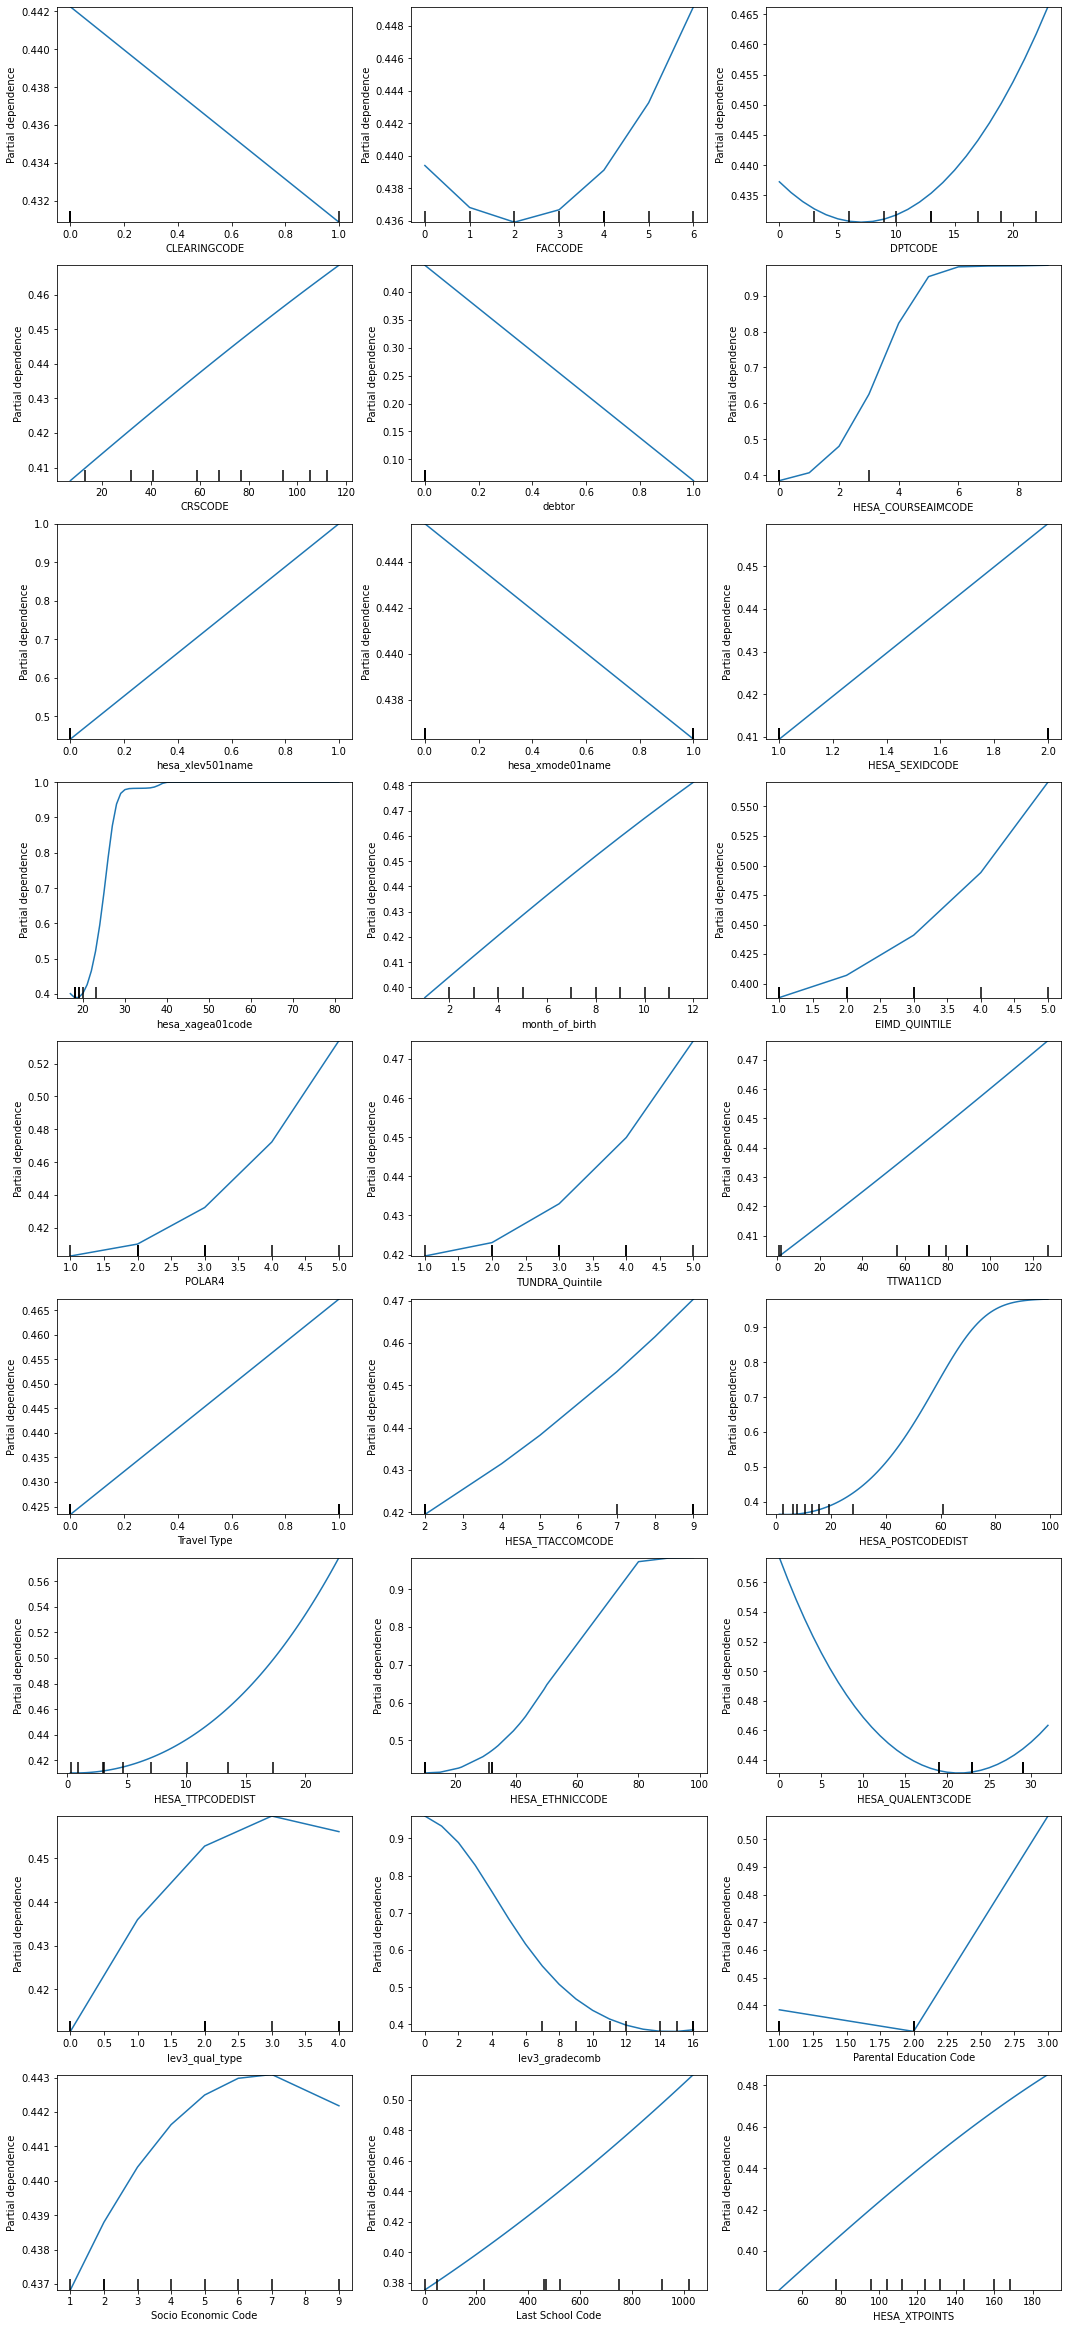

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(9,3,figsize=(18, 42))
j=-1
k=0
# ax.set_title("GNB")
for i in range(len(feature_names_non_aca)):
    if i%3==0:
        j+=1
        k=0
    dis=PartialDependenceDisplay.from_estimator(modelngb[0], X, features=[i], feature_names=feature_names_non_aca, ax=ax[j,k])
    k+=1

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(9,3,figsize=(18, 42))
j=-1
k=0
# ax.set_title("GNB")
for i in range(len(feature_names_non_aca)):
    if i%3==0:
        j+=1
        k=0
    dis=PartialDependenceDisplay.from_estimator(dsm[0], X, features=[i], feature_names=feature_names_non_aca, ax=ax[j,k])
    k+=1

In [ ]:
nb_actual=GaussianNB()
xt,xtest,yt,ytest=train_test_split(X,y,stratify=y,random_state=100)
nb_actual.fit(xt,yt)


GaussianNB()

In [ ]:
pnn=nb_actual.predict(xtest)
print(confusion_matrix(pnn,ytest), classification_report(pnn,ytest))

[[ 142  385]
 [ 363 2346]]               precision    recall  f1-score   support

           0       0.28      0.27      0.28       527
           1       0.86      0.87      0.86      2709

    accuracy                           0.77      3236
   macro avg       0.57      0.57      0.57      3236
weighted avg       0.76      0.77      0.77      3236



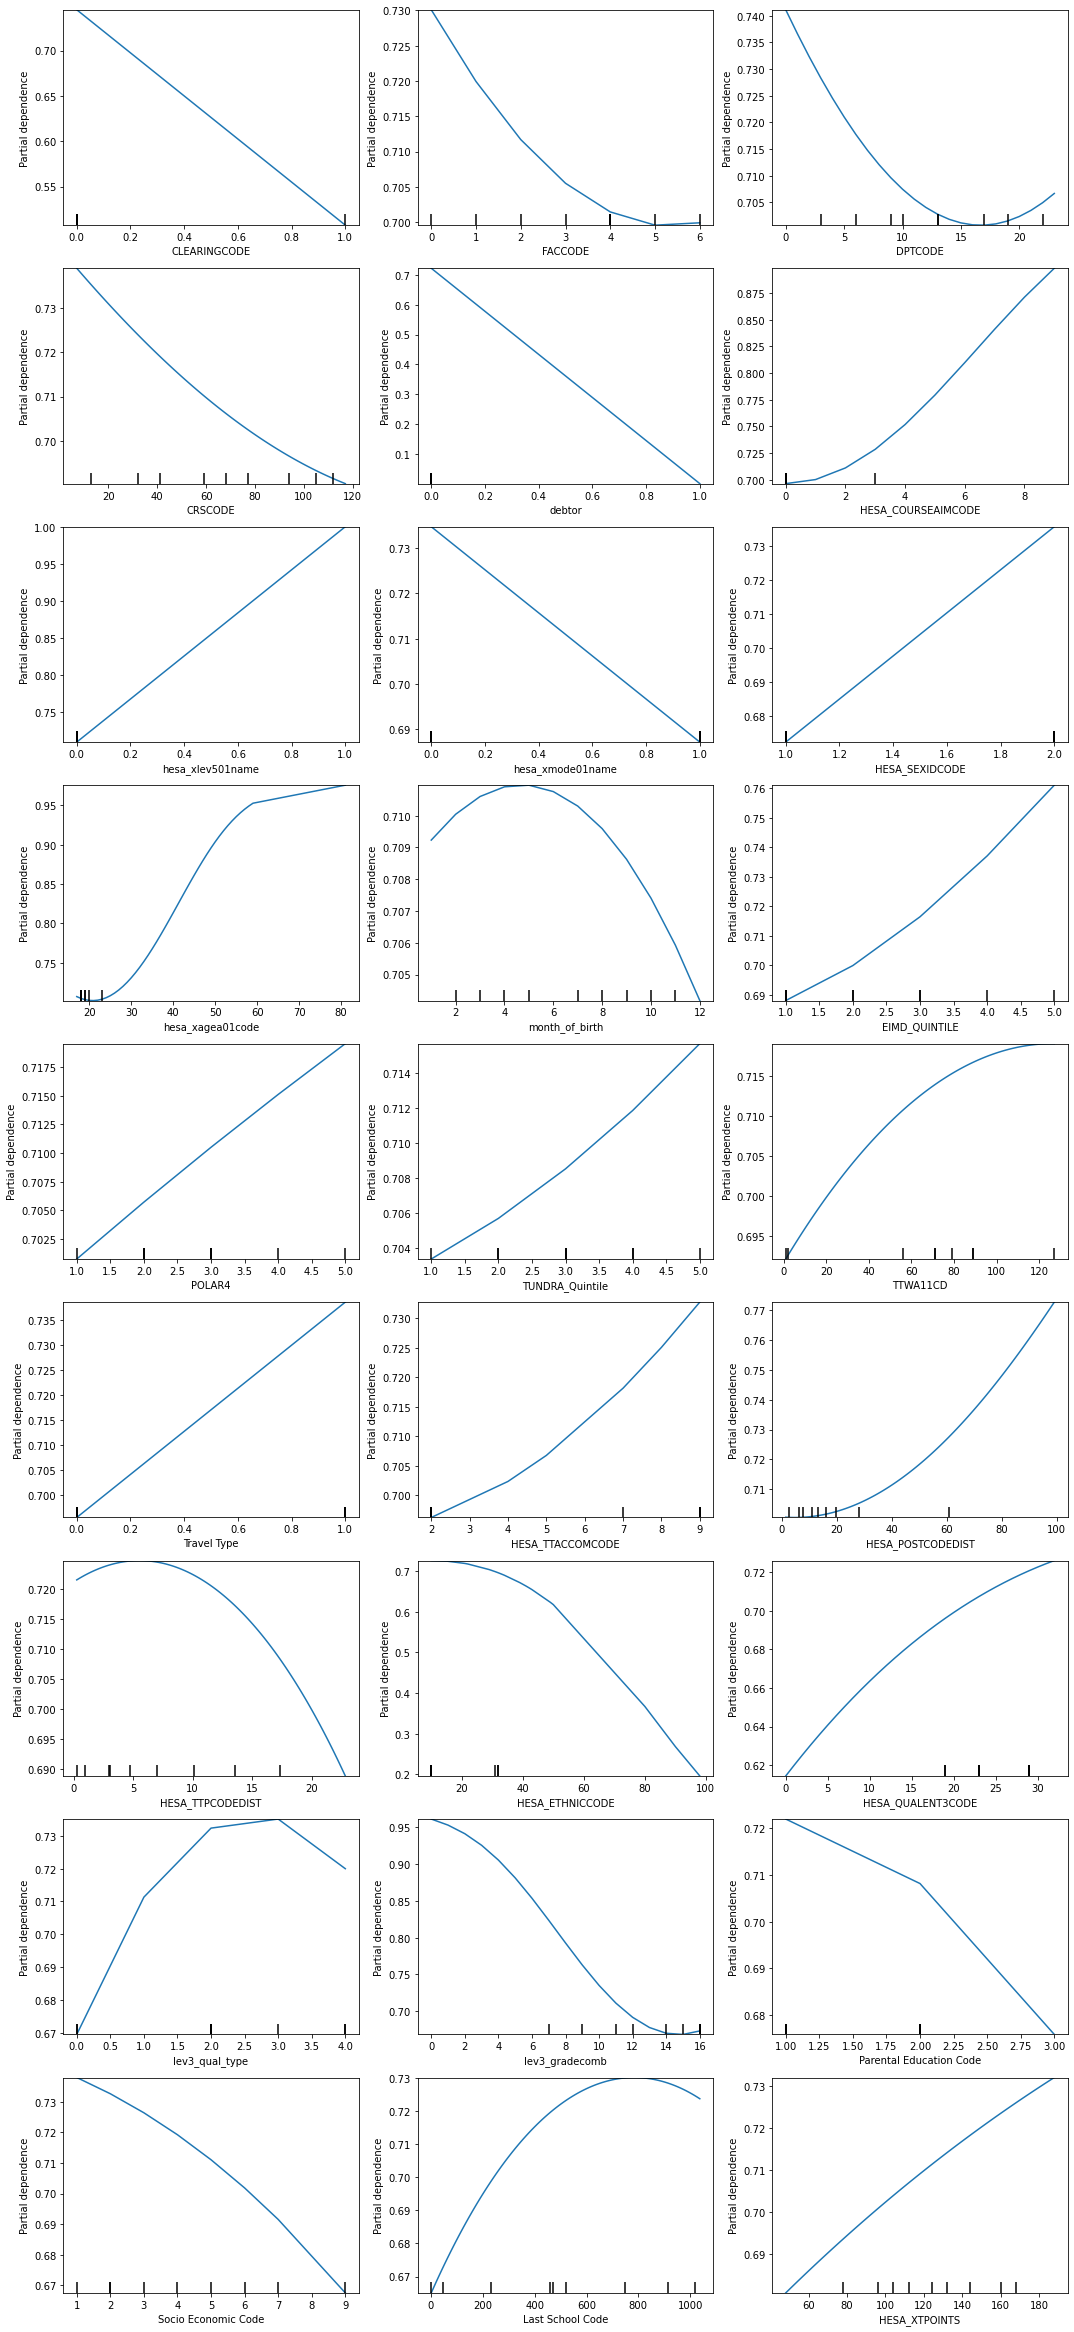

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(9,3,figsize=(18, 42))
j=-1
k=0
# ax.set_title("GNB_ACTUAL")
for i in range(len(feature_names_non_aca)):
    if i%3==0:
        j+=1
        k=0
    dis=PartialDependenceDisplay.from_estimator(nb_actual, X, features=[i], feature_names=feature_names_non_aca, ax=ax[j,k])
    k+=1

In [ ]:
xt,xtest,yt,ytest=train_test_split(X,y,stratify=y,random_state=100)

In [ ]:
dt_actual=DecisionTreeClassifier(max_depth=25,random_state=100)
dt_actual.fit(xt,yt)

DecisionTreeClassifier(max_depth=25, random_state=100)

In [ ]:
pdt=dt_actual.predict(xtest)
print(confusion_matrix(pdt,ytest), classification_report(pdt,ytest))

[[ 120  456]
 [ 385 2275]]               precision    recall  f1-score   support

           0       0.24      0.21      0.22       576
           1       0.83      0.86      0.84      2660

    accuracy                           0.74      3236
   macro avg       0.54      0.53      0.53      3236
weighted avg       0.73      0.74      0.73      3236



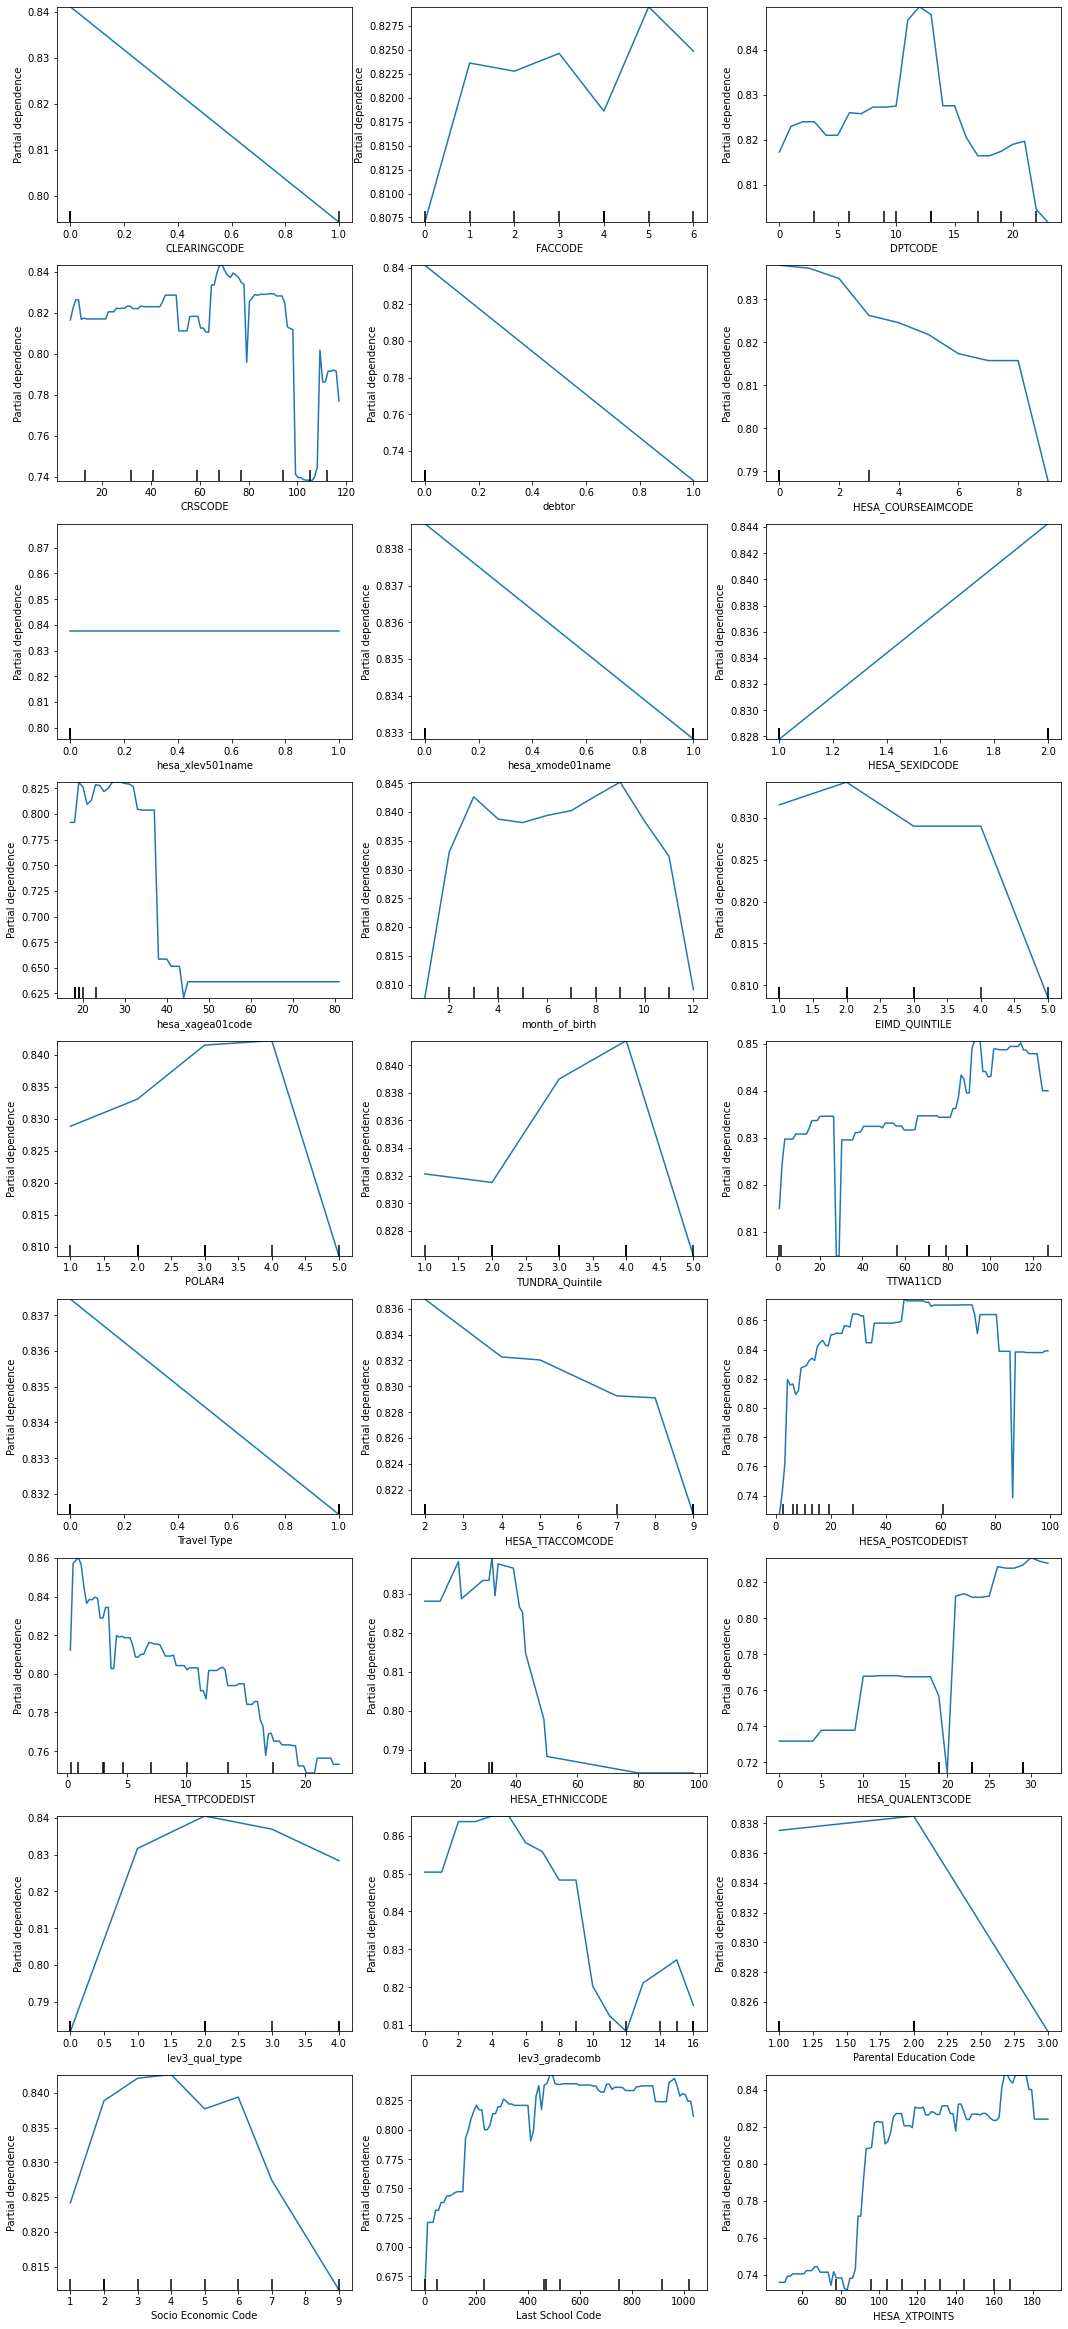

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(9,3,figsize=(18, 42))
j=-1
k=0
# ax.set_title("DT_ACTUAL")
for i in range(len(feature_names_non_aca)):
    if i%3==0:
        j+=1
        k=0
    dis=PartialDependenceDisplay.from_estimator(dt_actual, X, features=[i], feature_names=feature_names_non_aca, ax=ax[j,k])
    k+=1

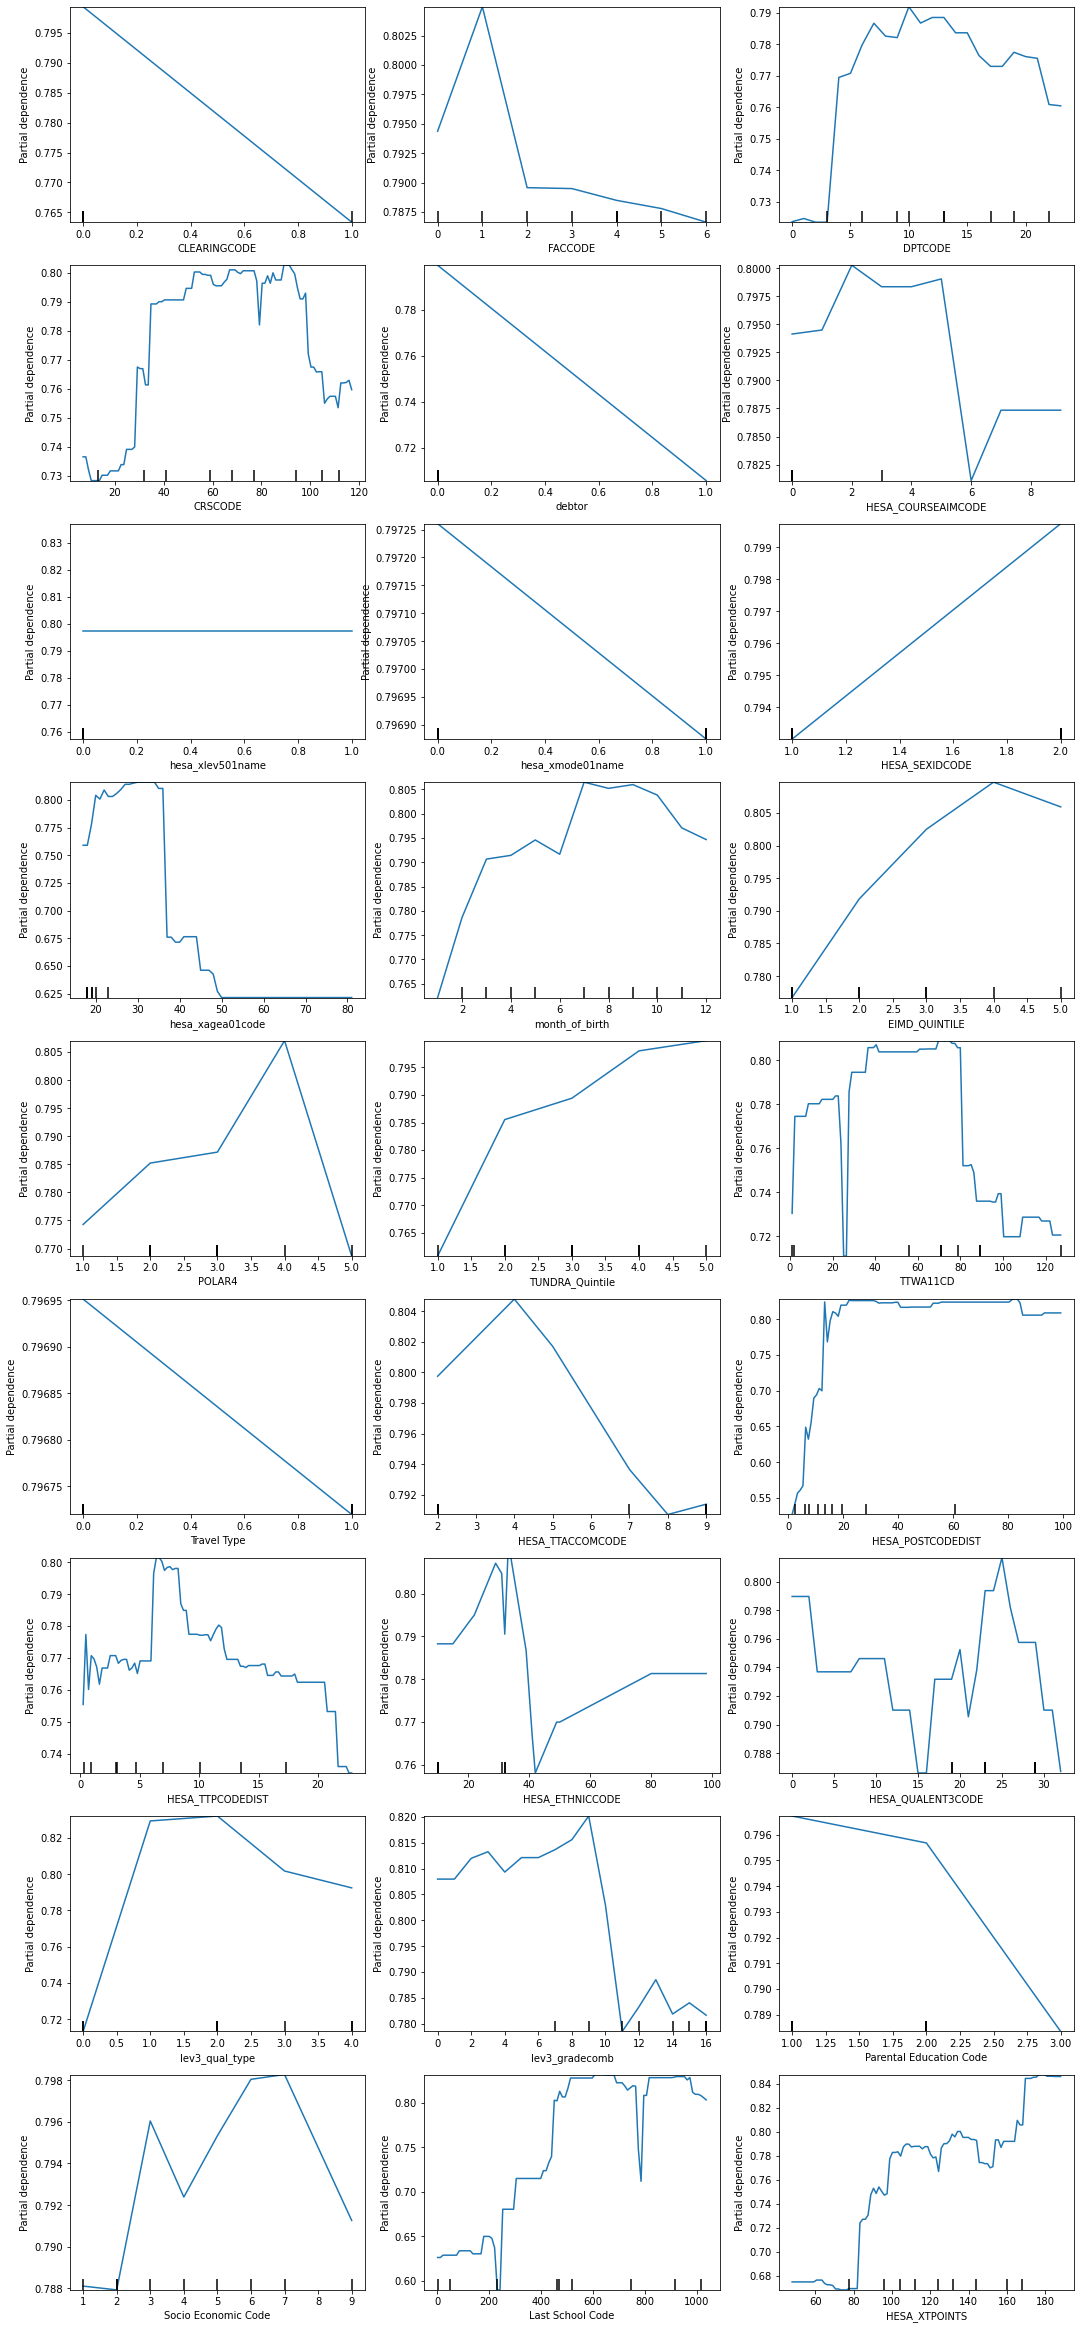

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(9,3,figsize=(18, 42))
j=-1
k=0
# ax.set_title("DT_ACTUAL")
for i in range(len(feature_names_non_aca)):
    if i%3==0:
        j+=1
        k=0
    dis=PartialDependenceDisplay.from_estimator(dsm[0], X, features=[i], feature_names=feature_names_non_aca, ax=ax[j,k])
    k+=1

2022-01-21 16:52:12,377 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:14,157 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[7/7] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:16,448 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[24/24] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:19,290 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[123/123] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:52:23,208 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:24,988 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:27,485 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:29,179 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:30,906 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:32,624 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[44/44] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:52:35,546 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[12/12] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:38,411 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:40,309 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:42,186 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:44,068 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[144/144] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:52:47,692 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:49,428 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[6/6] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:52:51,419 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[300/300] grid cells ████████████████████ Time elapsed: 4 seconds

2022-01-21 16:52:56,545 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[235/235] grid cells ████████████████████ Time elapsed: 3 seconds

2022-01-21 16:53:01,229 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[18/18] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:53:04,163 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[33/33] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:53:07,269 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:53:09,211 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[17/17] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:53:12,210 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[3/3] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:53:14,269 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[8/8] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:53:16,559 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[152/152] grid cells ████████████████████ Time elapsed: 3 seconds

2022-01-21 16:53:20,589 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[208/208] grid cells ████████████████████ Time elapsed: 3 seconds

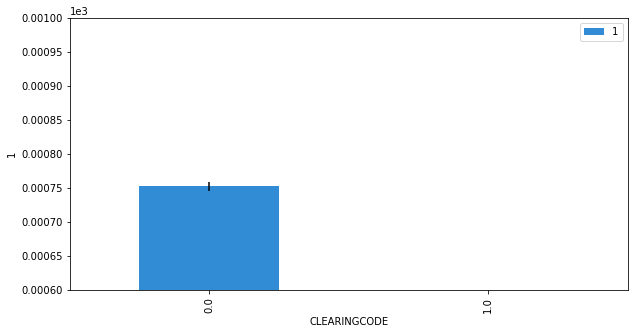

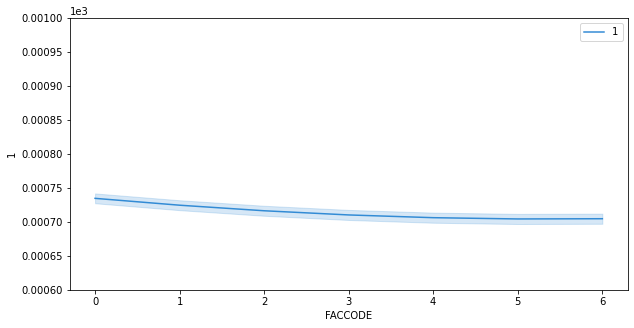

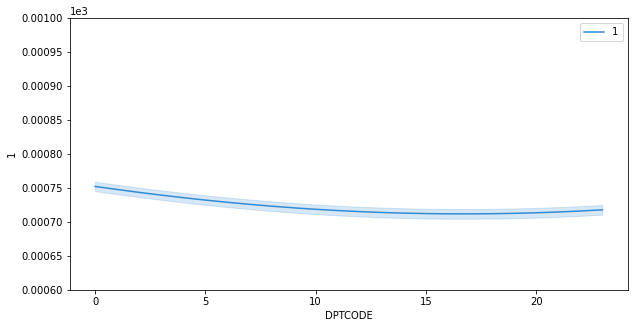

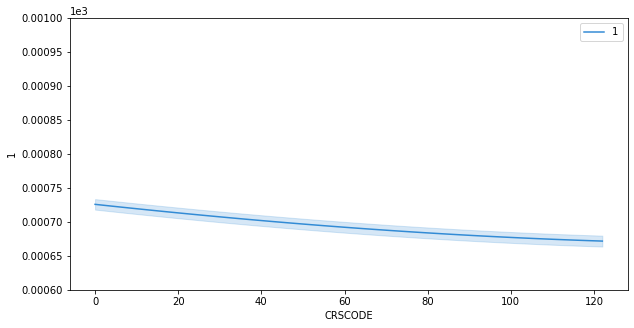

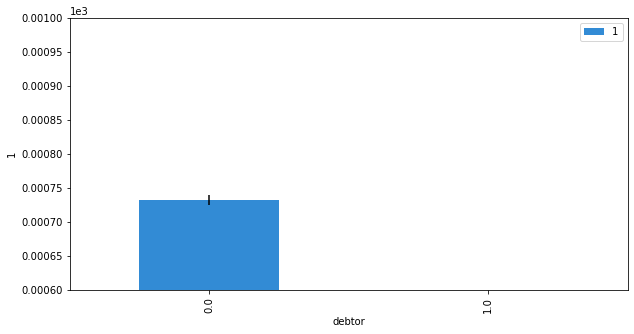

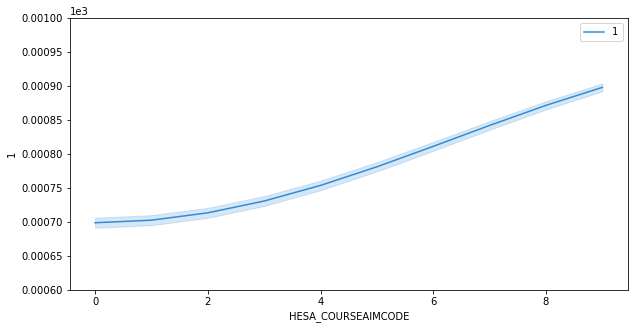

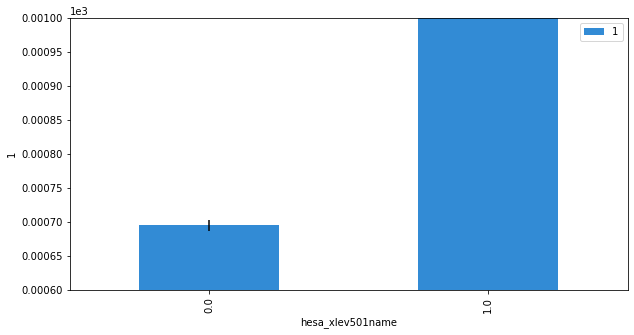

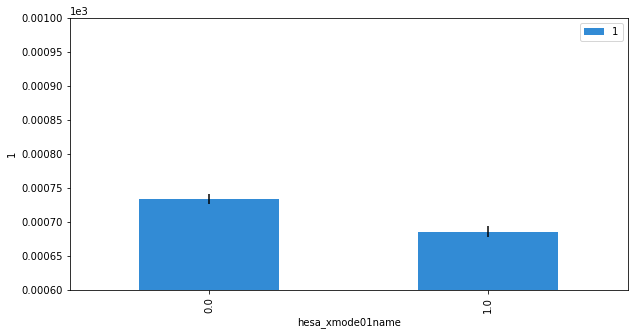

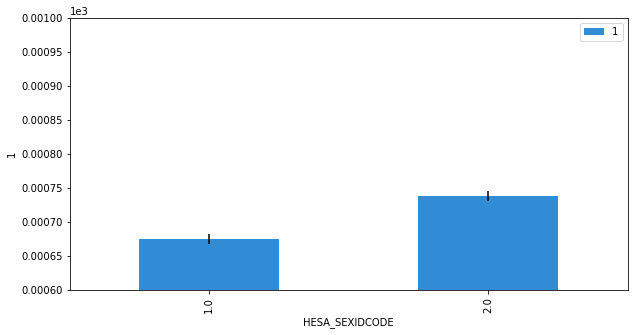

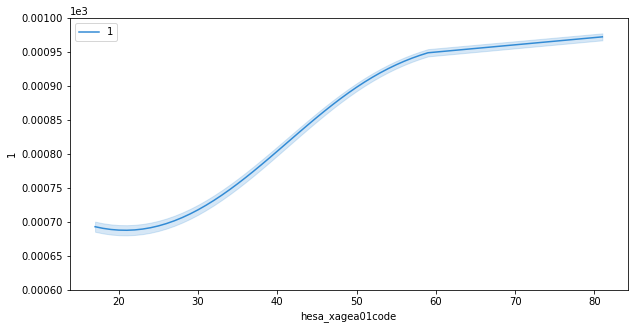

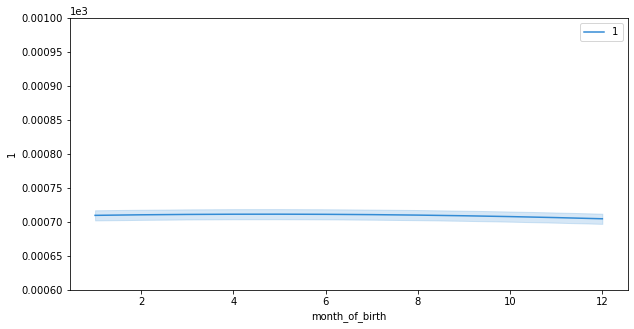

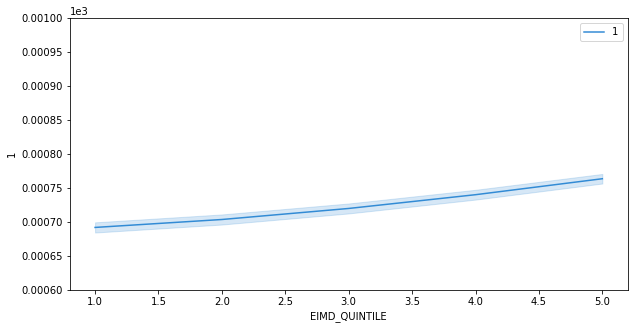

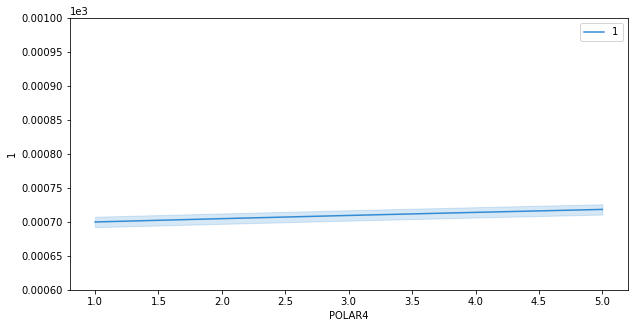

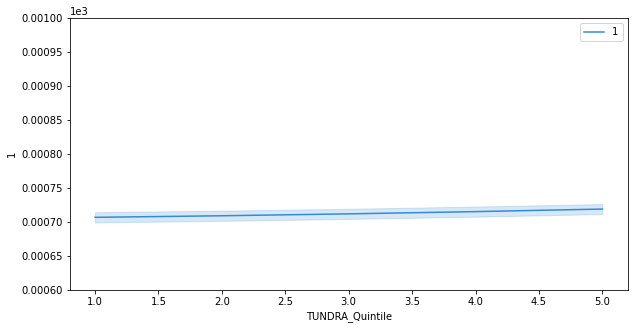

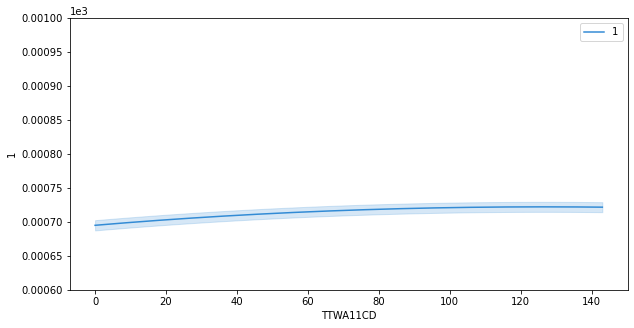

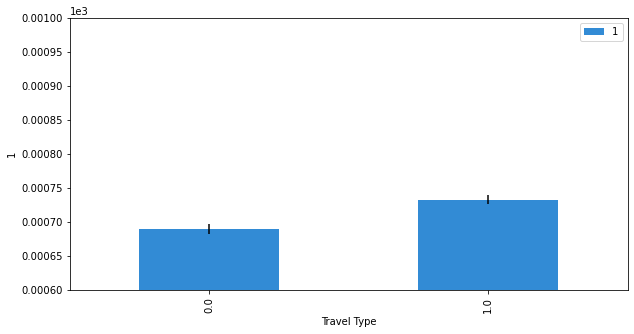

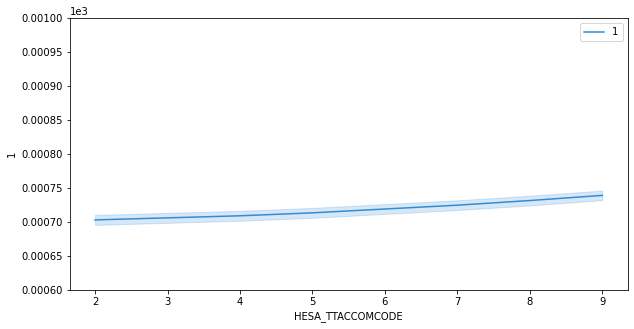

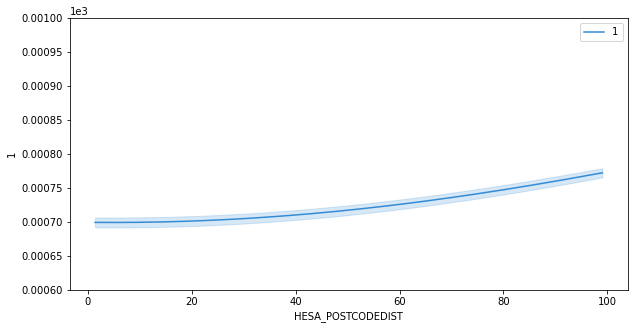

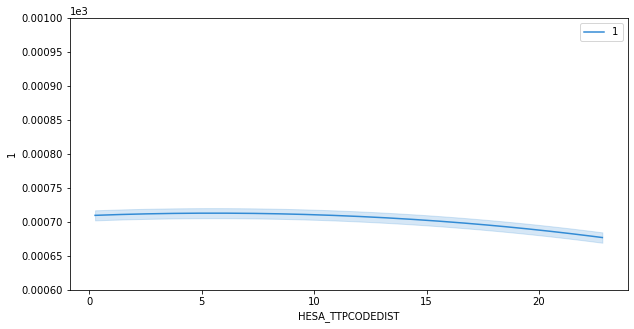

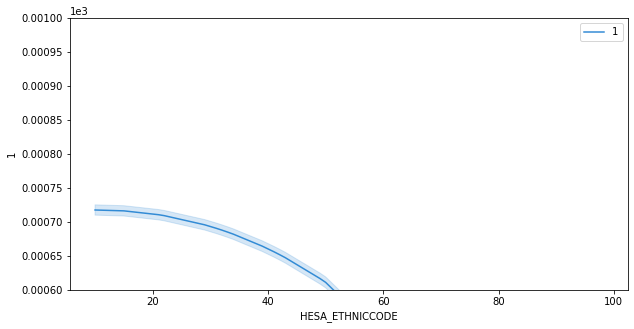

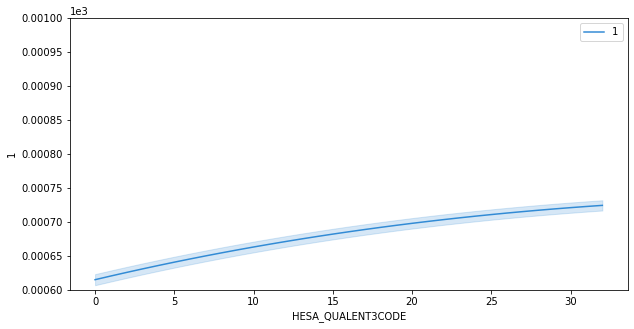

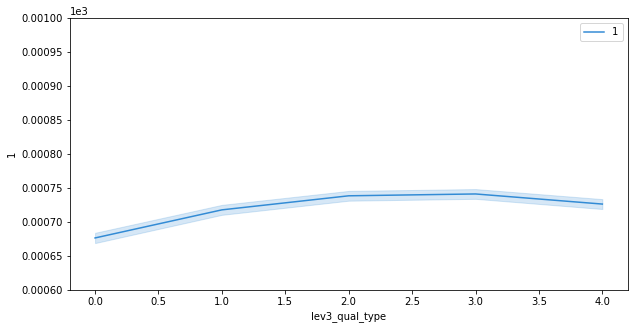

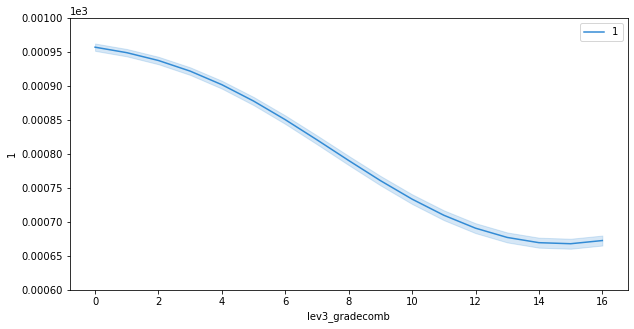

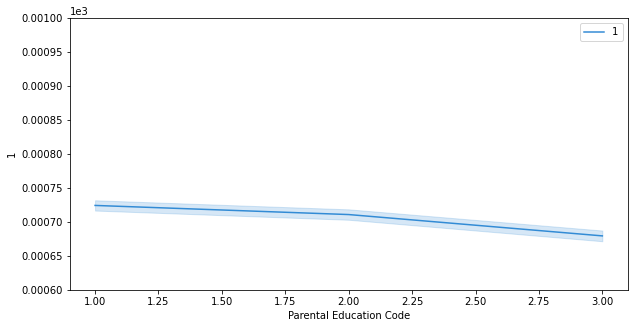

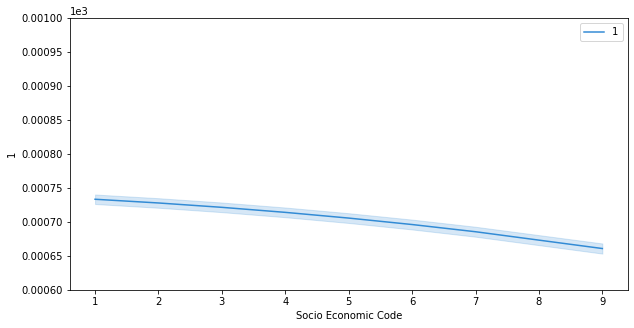

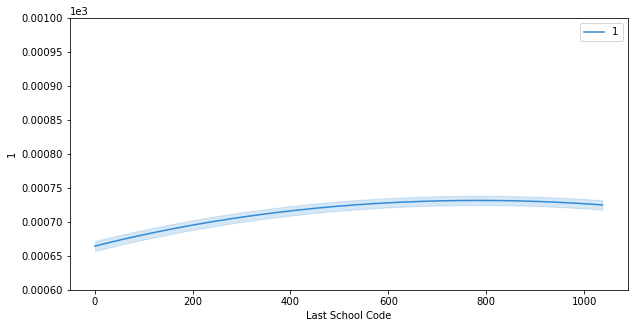

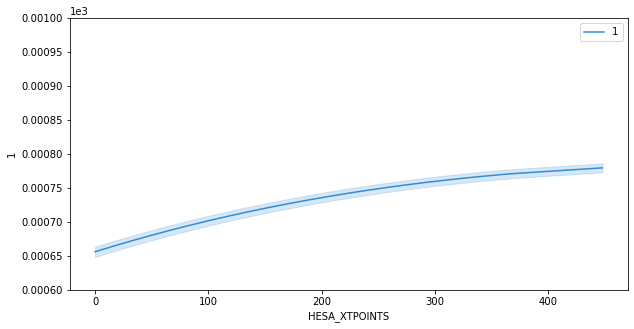

In [ ]:
pyint_model = InMemoryModel(nb_actual.predict_proba, examples=X, target_names=['0','1'])
for i in feature_names_non_aca:
    axes_list = interpreter.partial_dependence.plot_partial_dependence([i],
             pyint_model, grid_resolution=300, with_variance=True,figsize = (10, 5))
    ax = axes_list[0][1]
#     ax.legend()
# ax.set_title('NB_ACTUAL')
    ax.set_ylim(0.6, 1.0)

2022-01-21 16:47:26,168 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:28,004 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[7/7] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:30,195 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[24/24] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:47:33,184 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[123/123] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:47:36,844 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:38,626 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:41,195 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:42,992 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:45,076 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:46,880 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[44/44] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:47:50,013 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[12/12] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:47:52,975 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:54,920 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:57,027 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:47:59,126 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[144/144] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:48:02,994 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:48:04,826 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[6/6] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:48:06,946 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[300/300] grid cells ████████████████████ Time elapsed: 4 seconds

2022-01-21 16:48:12,412 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[235/235] grid cells ████████████████████ Time elapsed: 4 seconds

2022-01-21 16:48:17,409 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[18/18] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:48:20,518 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[33/33] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:48:23,765 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:48:25,737 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[17/17] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:48:28,901 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[3/3] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:48:30,694 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[8/8] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:48:33,071 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[152/152] grid cells ████████████████████ Time elapsed: 3 seconds

2022-01-21 16:48:37,368 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[208/208] grid cells ████████████████████ Time elapsed: 3 seconds

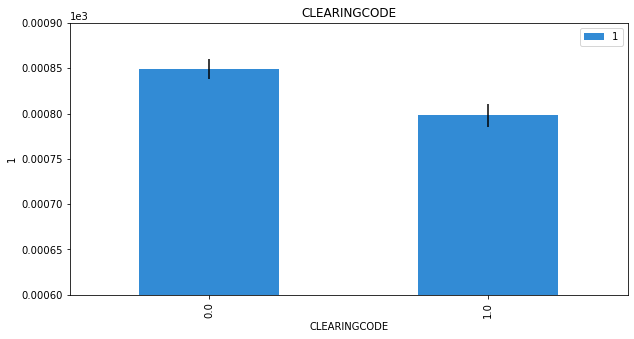

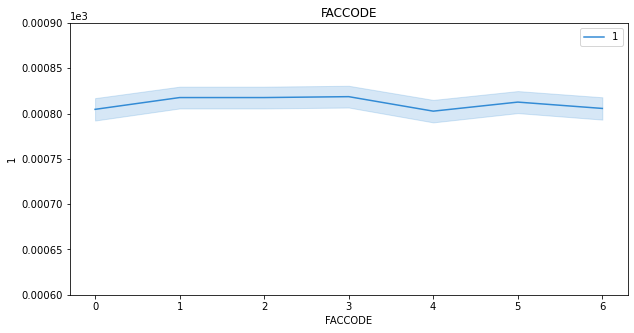

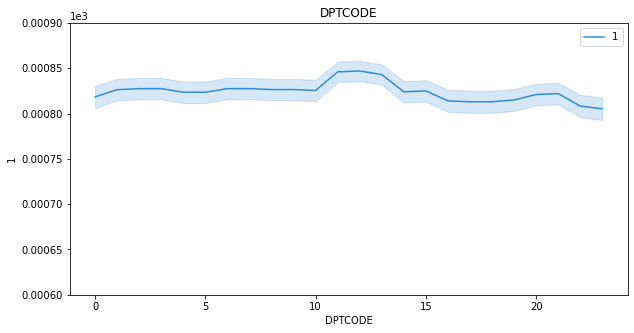

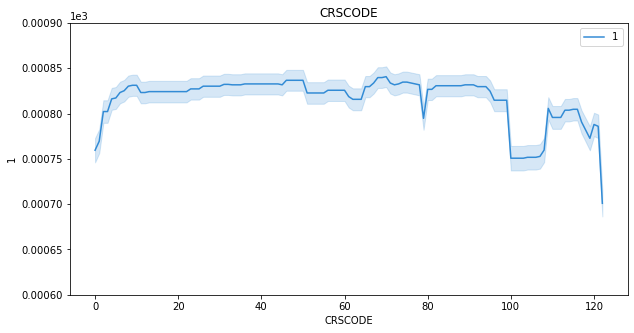

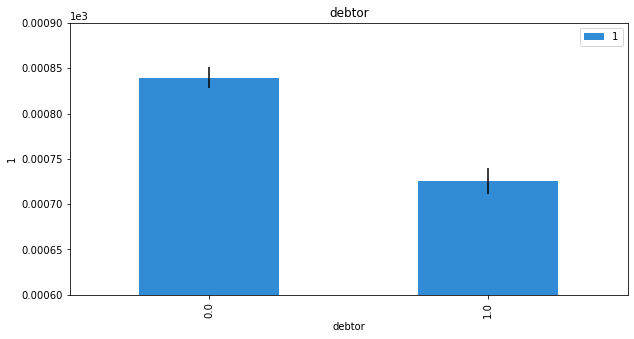

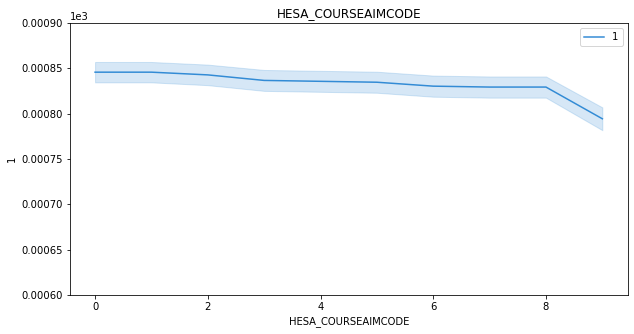

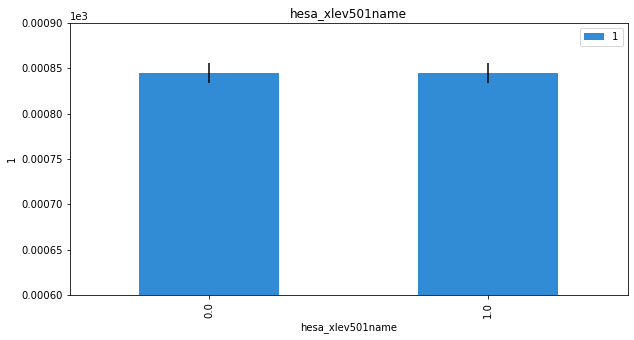

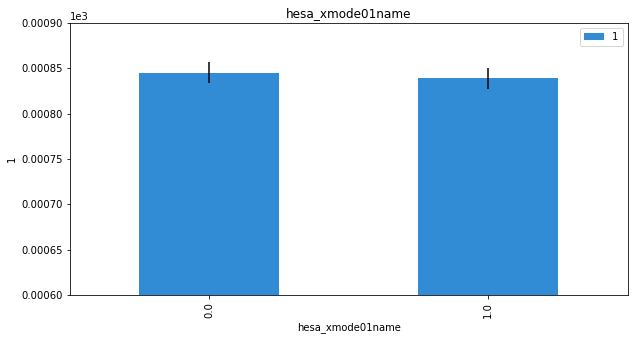

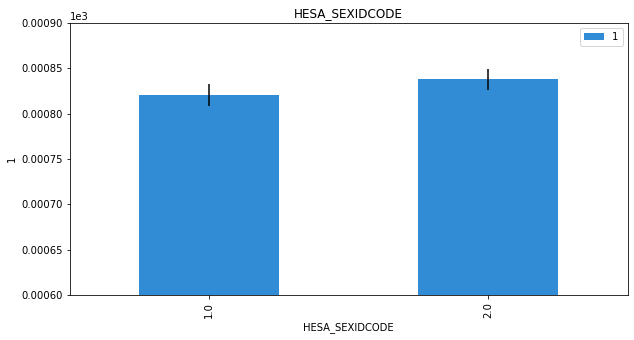

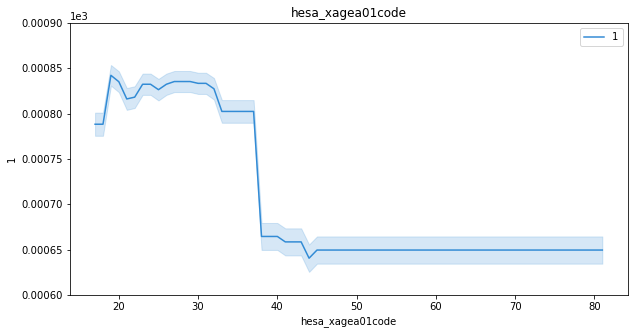

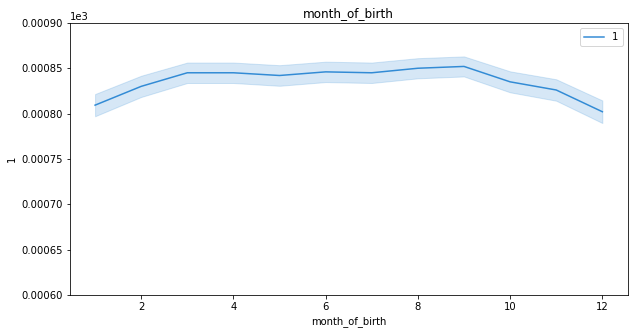

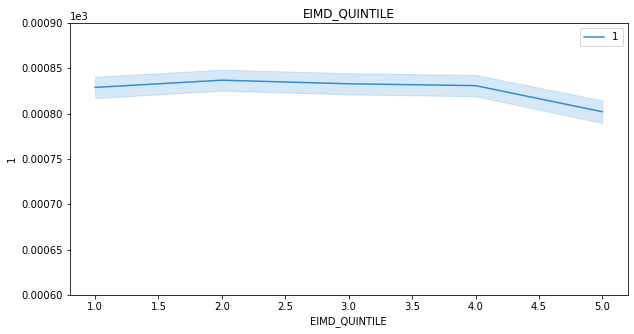

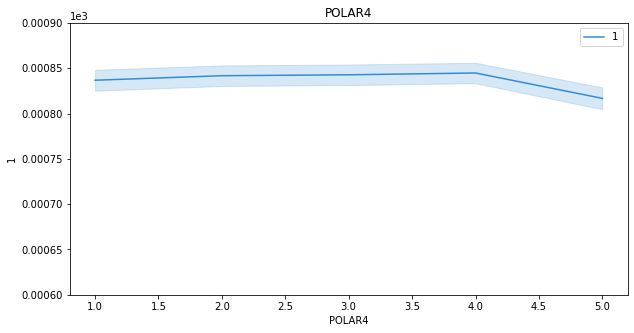

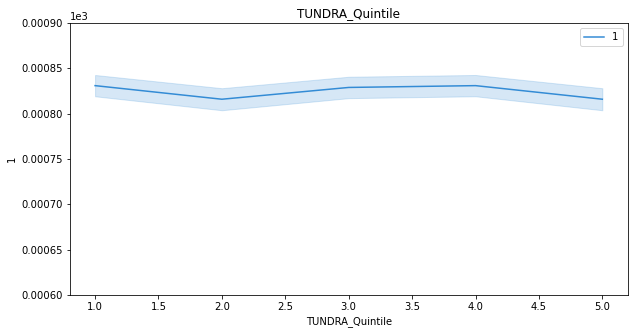

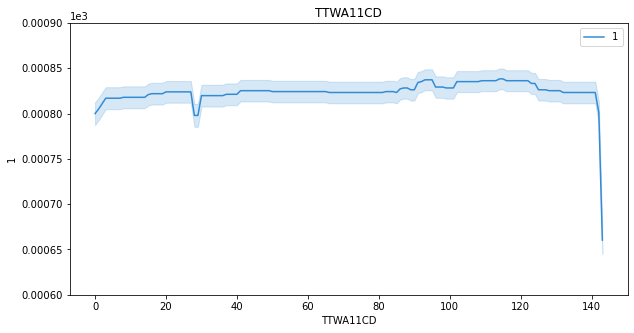

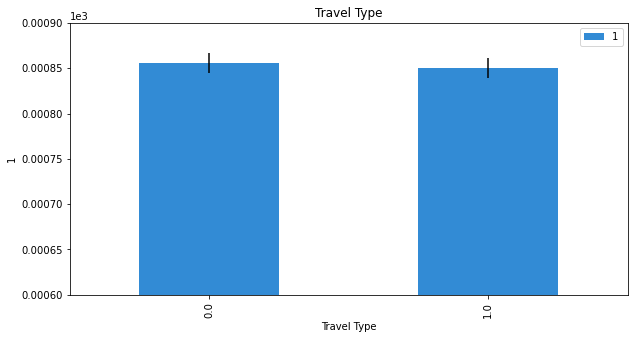

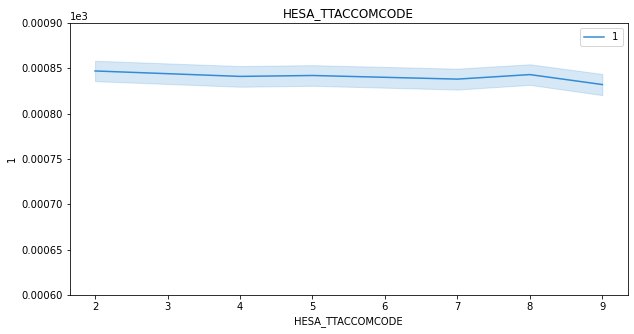

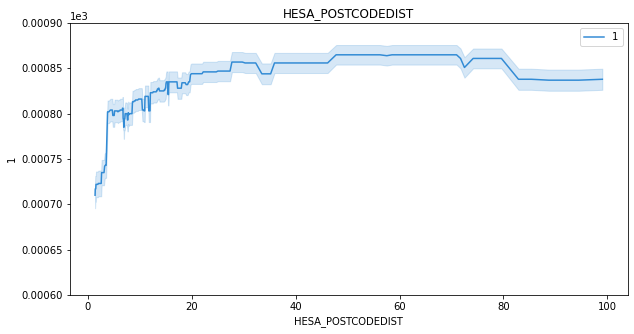

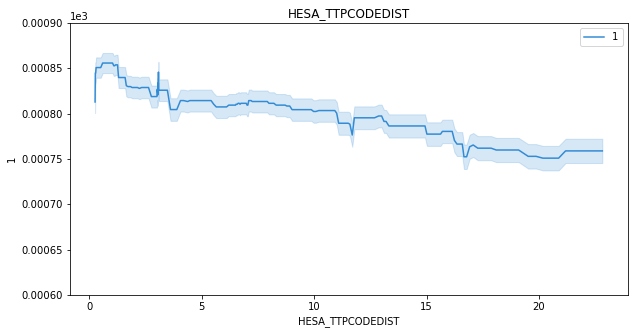

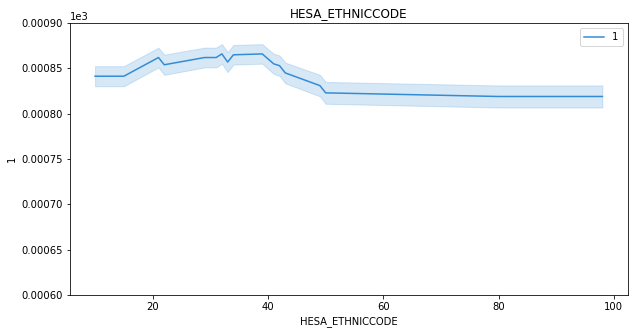

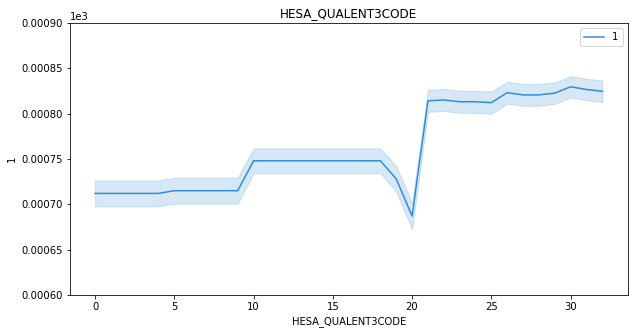

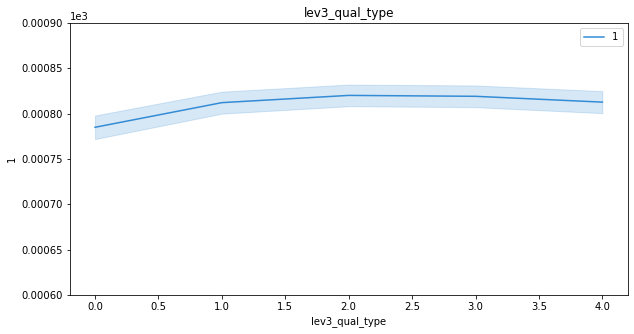

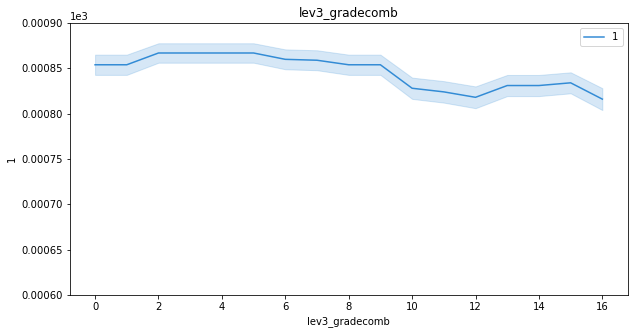

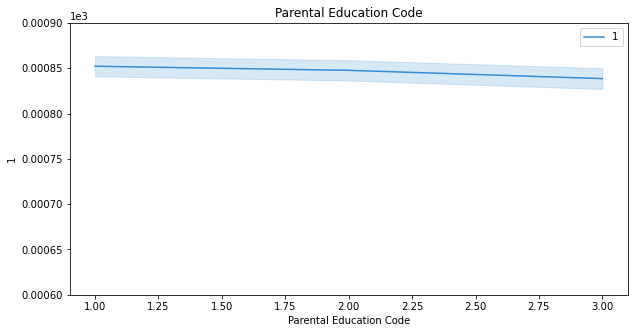

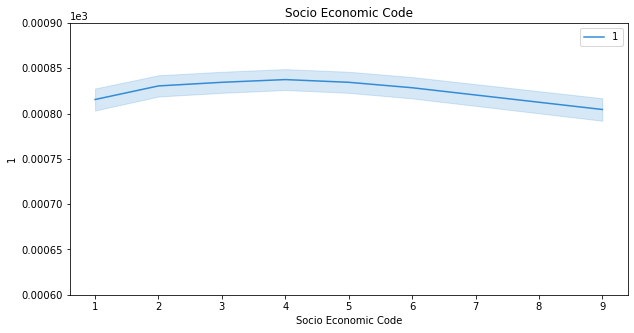

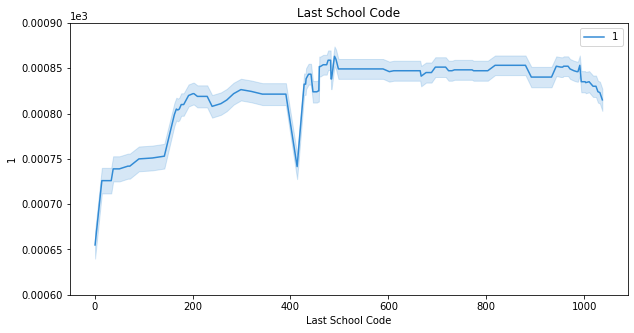

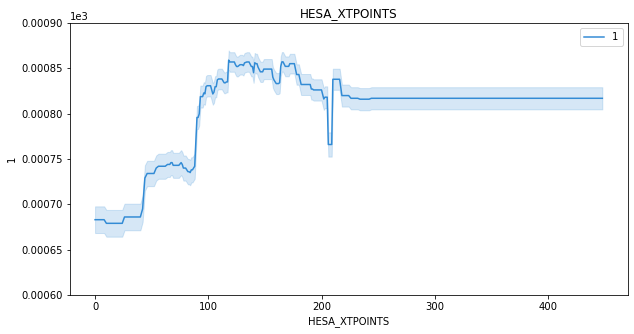

In [ ]:
pyint_model = InMemoryModel(dt_actual.predict_proba, examples=X, target_names=['0','1'])
ax.set_title('DT_ACTUAL')
for i in feature_names_non_aca:
    axes_list = interpreter.partial_dependence.plot_partial_dependence([i],
             pyint_model, grid_resolution=300, with_variance=True,figsize = (10, 5))
    ax = axes_list[0][1]
    ax.set_title(i)

    ax.set_ylim(0.6, 0.9)

2022-01-21 16:57:02,183 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:04,001 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[7/7] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:06,283 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[24/24] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:09,443 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[123/123] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:13,258 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:15,079 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:17,662 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:19,466 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:21,378 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:23,163 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[44/44] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:26,249 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[12/12] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:29,128 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:31,107 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:33,121 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:35,098 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[144/144] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:38,933 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[2/2] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:40,985 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[6/6] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:57:43,120 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[300/300] grid cells ████████████████████ Time elapsed: 4 seconds

2022-01-21 16:57:48,620 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[235/235] grid cells ████████████████████ Time elapsed: 3 seconds

2022-01-21 16:57:53,509 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[18/18] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:56,592 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[33/33] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:57:59,785 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:58:01,760 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[17/17] grid cells ████████████████████ Time elapsed: 2 seconds

2022-01-21 16:58:05,077 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[3/3] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:58:06,921 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[8/8] grid cells ████████████████████ Time elapsed: 1 seconds

2022-01-21 16:58:09,355 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[152/152] grid cells ████████████████████ Time elapsed: 3 seconds

2022-01-21 16:58:13,606 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[208/208] grid cells ████████████████████ Time elapsed: 3 seconds

Text(0.5, 1.0, 'DT_SAMPLED')

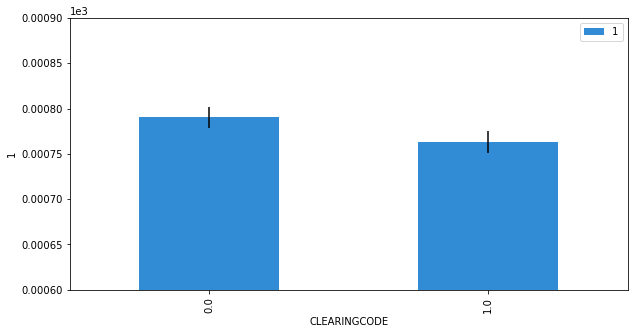

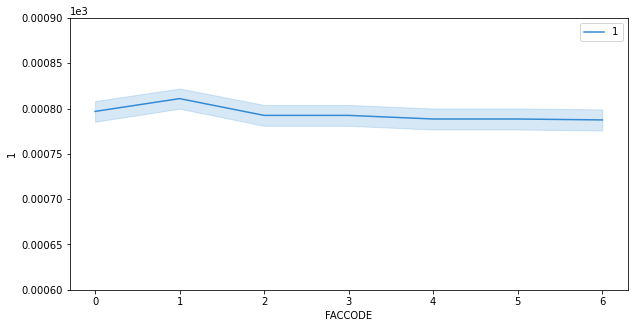

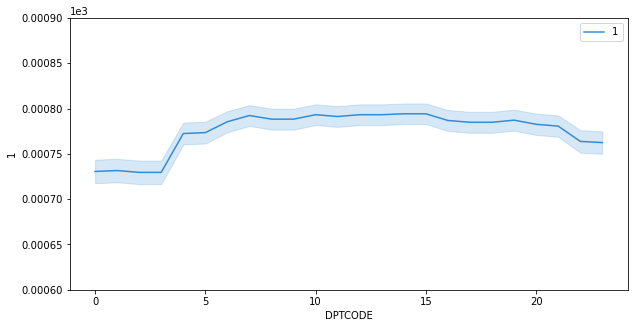

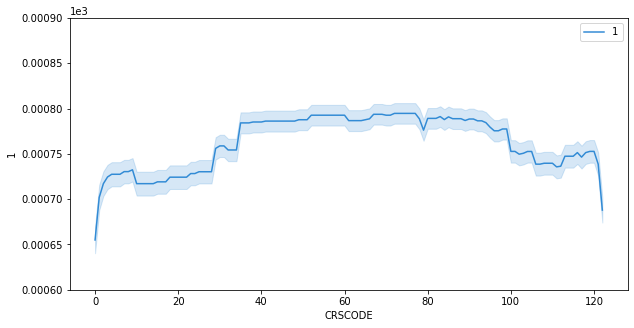

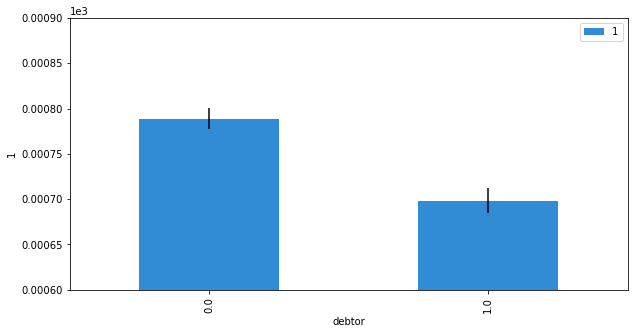

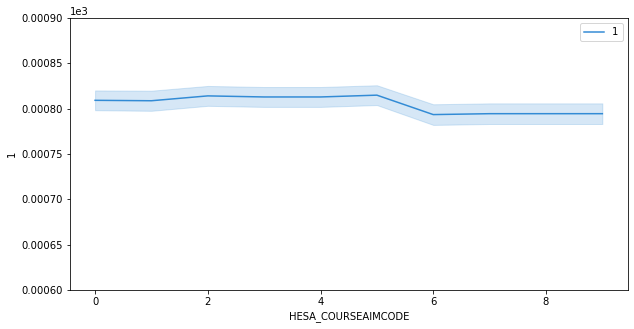

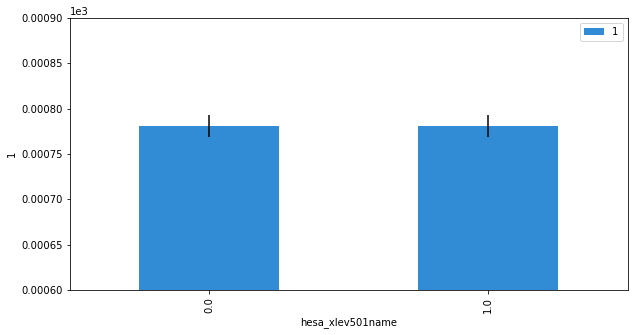

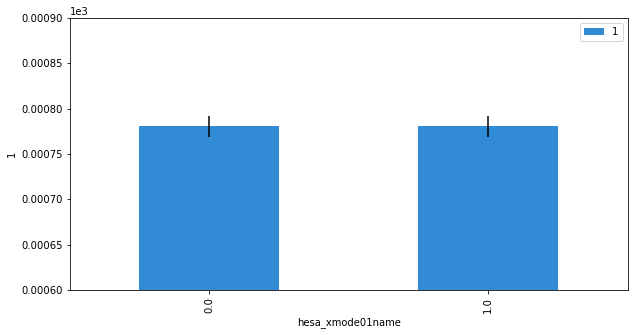

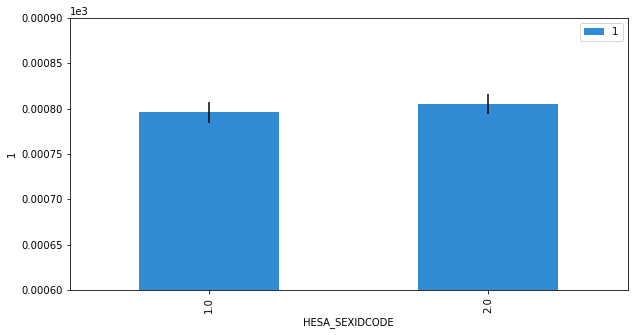

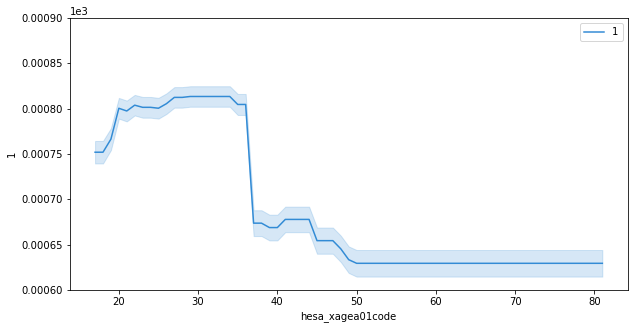

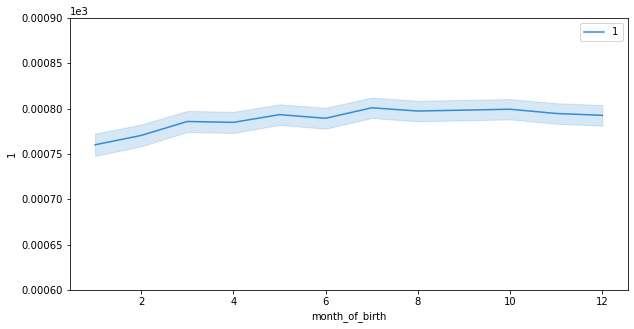

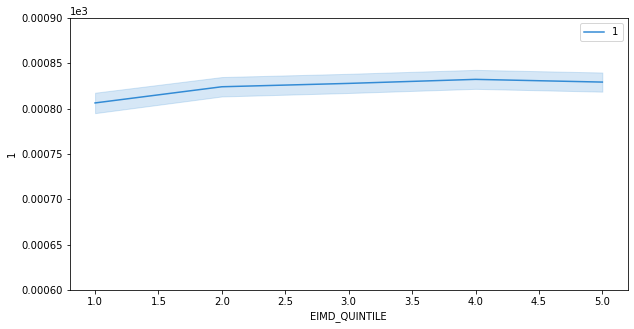

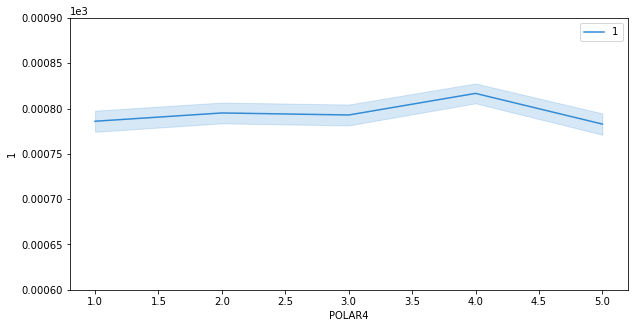

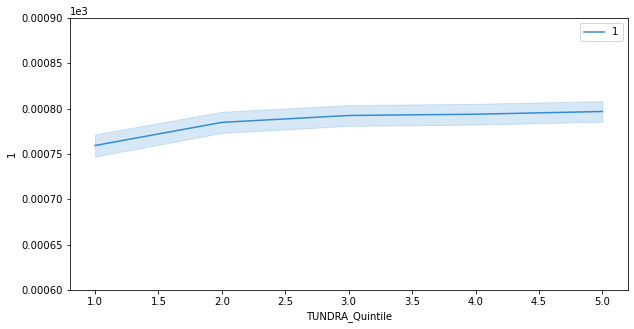

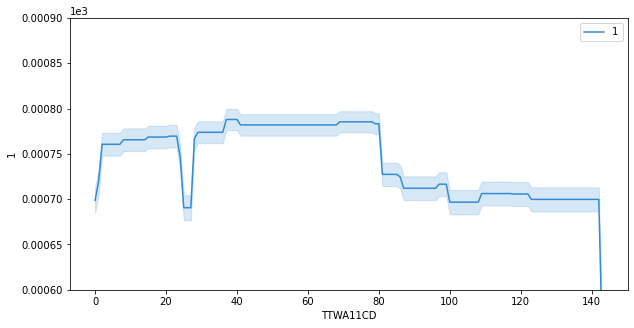

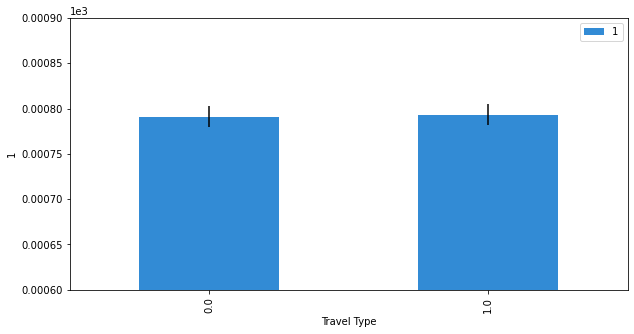

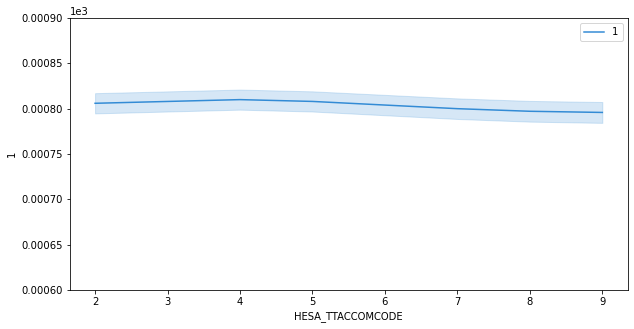

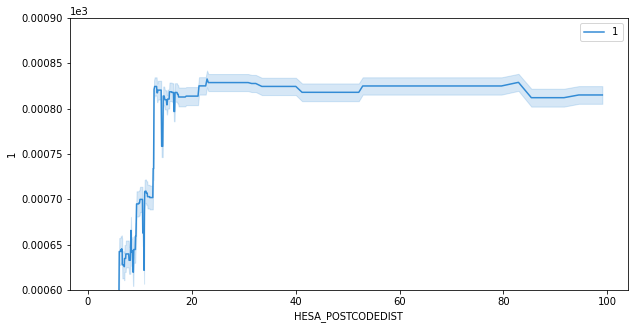

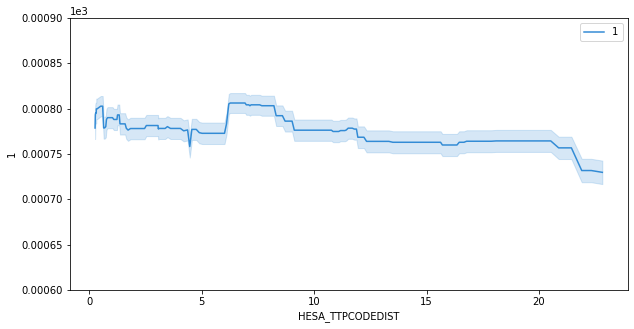

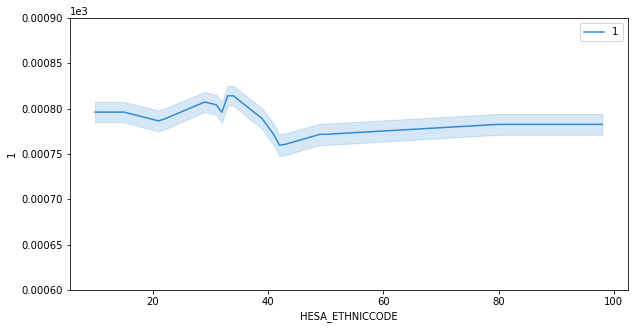

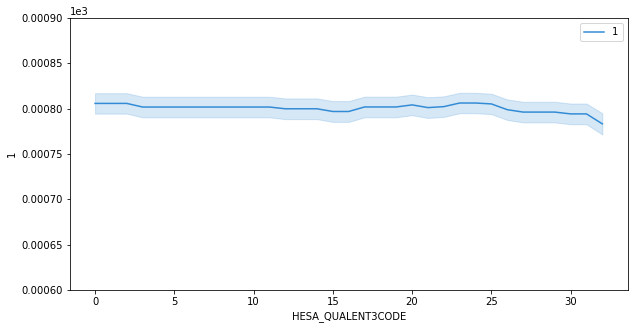

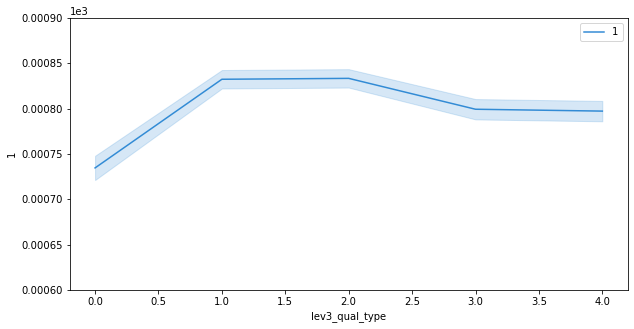

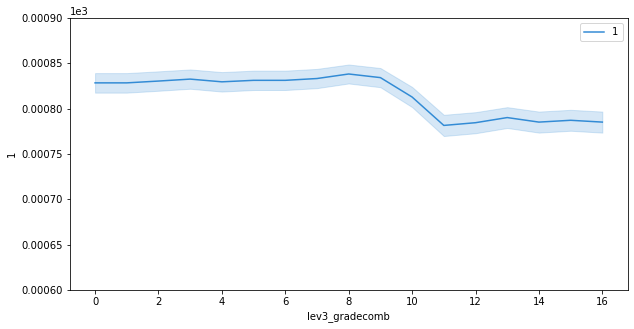

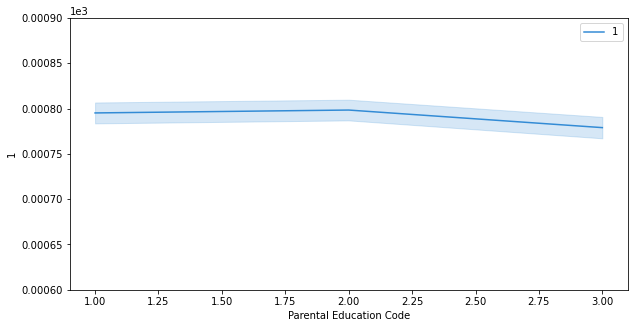

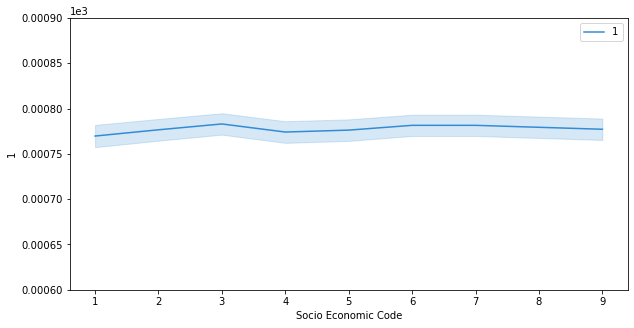

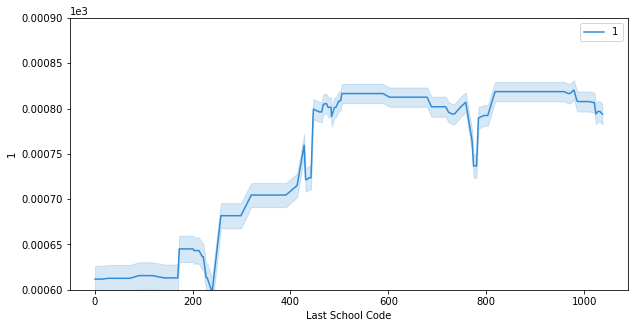

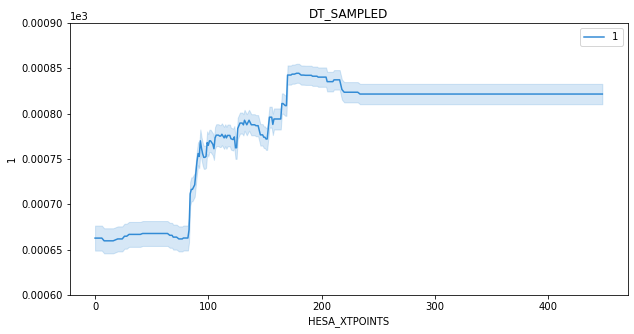

In [ ]:
pyint_model = InMemoryModel(dsm[0].predict_proba, examples=X, target_names=['0','1'])
for i in feature_names_non_aca:
    axes_list = interpreter.partial_dependence.plot_partial_dependence([i],
             pyint_model, grid_resolution=300, with_variance=True,figsize = (10, 5))
    ax = axes_list[0][1]
    ax.set_ylim(0.6, 0.9)
# ax.legend()
ax.set_title('DT_SAMPLED')
